Decision Tree for Student Profile

http://www.educationplanner.org/students/self-assessments/learning-styles-quiz.shtml



In [1]:
#Libraries
%matplotlib inline
import matplotlib.pyplot as plt

import io
import random

import os
os.environ["PATH"] += os.pathsep + r'C:\Program Files (x86)\Graphviz2.38\bin'

import pandas as pd
from pandas import read_csv

import numpy as np
import matplotlib.pyplot as plt

import pydotplus #pip install pydotplus
import graphviz 

from sklearn import tree
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.model_selection import train_test_split

#For Google Sheets
from google.colab import auth
auth.authenticate_user()

import gspread
from google.auth import default
creds, _ = default()

gc = gspread.authorize(creds)

In [2]:
#Check if Google sheets is updated correctly
#!pip install --upgrade gspread

In [3]:
#Import .csv here from computer https://www.youtube.com/watch?v=dEB-7w3jBKU
#upload_files = files.upload()
#for filename in upload_files.keys():
#  x=upload_files[filename].decode('utf-8')
#data1 = pd.read_csv(io.StringIO(x), header=None)
#print(data1.head())

**DATA CLEAN UP**

In [4]:
#Import directly from Google Sheets
#gc = gspread.authorize(GoogleCredentials.get_application_default())

#https://docs.google.com/forms/d/1B5fZmq7gu8LxAQHB7yITqrvw8WQIcz6JybNPhDw7JfY/edit#responses
worksheet = gc.open('LTU Campus Learning Style Questionnaire (Responses)').sheet1

# get_all_values gives a list of rows
rows = worksheet.get_all_values()
print(rows)

# Convert to a DataFrame and render
data = pd.DataFrame.from_records(rows)
data

[['Timestamp', 'What is your age? (Only use numbers; ex: 20)', 'What is your gender? ', 'Which LTU department are you in?', 'What is your major?', 'What is your minor? (Leave blank if not applicable)', 'What is your dual major? (Leave blank if not applicable)', 'Are you a commuter student?', 'Are you an international student?', 'Before taking the personality quiz, what do you think your learning style is?', 'Do you like online learning? ', 'What do you prefer more?', 'How often do you procrastinate?', 'How often do you get distracted in class/doing homework?', 'On average, how long is your average attention span? (Answer in number of minutes; ex: 60)', 'If you need help with homework/studying, what do you go to first?', 'Do you use online study tools (ex: Chegg, Bartleby, Slader, Symbolab, Wolfram Alpha, any online calculator, etc.)?', 'What kind of book would you like to read for fun? ', 'When you are not sure how to spell a word, what are you most likely to do?', "You're out shopping

,0,1,2,3,4,5,6,7,8,9,...,28,29,30,31,32,33,34,35,36,37
0,Timestamp,What is your age? (Only use numbers; ex: 20),What is your gender?,Which LTU department are you in?,What is your major?,What is your minor? (Leave blank if not applic...,What is your dual major? (Leave blank if not a...,Are you a commuter student?,Are you an international student?,"Before taking the personality quiz, what do yo...",...,"Of these three classes, which is your favorite?","When you hear a song on the radio, what are yo...",What do you find most distracting when in class?,What do you like to do to relax?,What is the best way for you to remember a fri...,"If you won a game, which of these three prizes...",Which would you rather go to with a group of f...,What are you most likely to remember about new...,When you give someone directions to your house...,What type of online class do you prefer?
1,2/2/2022 0:43:34,22,Male,College of Arts + Sciences: Math + Computer Sc...,Computer Science,,,Yes,No,Tactile (Hands-on),...,1,2,3,2,3,3,3,3,2,Mix of synchronous and asynchronous
2,2/2/2022 13:40:13,19,Female,College of Architecture,Architecture,,,No,No,Visual,...,1,1,2,2,3,1,1,3,3,Mix of synchronous and asynchronous
3,2/2/2022 13:41:40,19,Female,College of Engineering: Civil + Architectural ...,Civil Engineering,,,No,No,Visual,...,2,2,3,3,3,3,3,1,2,Asynchronous
4,2/2/2022 13:42:16,20,Female,College of Arts + Sciences: Natural Sciences,Nursing,pre-law and philosophy (but I'm dropping philo...,,No,No,Auditory,...,1,2,2,2,3,3,3,3,2,Synchronous
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,2/17/2022 20:50:59,19,Male,College of Engineering: Civil + Architectural ...,Architectural Engineering,,,No,No,Tactile (Hands-on),...,2,2,3,2,3,1,3,3,1,Mix of synchronous and asynchronous
140,2/17/2022 20:56:41,24,Male,"College of Engineering: Mechanical, Robotics, ...",Automotive Engineering,,,Yes,Yes,Tactile (Hands-on),...,1,3,3,3,1,3,2,1,1,Mix of synchronous and asynchronous
141,2/17/2022 21:30:03,21,Male,"College of Engineering: Mechanical, Robotics, ...",Mechanical Engineering,,,Yes,No,Tactile (Hands-on),...,1,3,3,2,2,1,2,1,3,Mix of synchronous and asynchronous
142,2/18/2022 15:27:45,19,Female,College of Architecture,Architecture,,,No,No,Visual,...,1,2,2,2,3,1,3,1,1,Mix of synchronous and asynchronous


In [5]:
#Drop columns with info we don't need
data = data.drop([0], axis = 1)

In [6]:
#Drop first row (headers)
#data = data.iloc[0:]
data = data.drop([0], axis=0)

In [7]:
data

,1,2,3,4,5,6,7,8,9,10,...,28,29,30,31,32,33,34,35,36,37
1,22,Male,College of Arts + Sciences: Math + Computer Sc...,Computer Science,,,Yes,No,Tactile (Hands-on),Depends,...,1,2,3,2,3,3,3,3,2,Mix of synchronous and asynchronous
2,19,Female,College of Architecture,Architecture,,,No,No,Visual,Depends,...,1,1,2,2,3,1,1,3,3,Mix of synchronous and asynchronous
3,19,Female,College of Engineering: Civil + Architectural ...,Civil Engineering,,,No,No,Visual,Depends,...,2,2,3,3,3,3,3,1,2,Asynchronous
4,20,Female,College of Arts + Sciences: Natural Sciences,Nursing,pre-law and philosophy (but I'm dropping philo...,,No,No,Auditory,No,...,1,2,2,2,3,3,3,3,2,Synchronous
5,21,Male,College of Arts + Sciences: Natural Sciences,Molecular and Cell Biology,Chemistry and Psychology,,No,No,Tactile (Hands-on),Depends,...,1,2,2,2,3,1,1,1,1,Synchronous
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,19,Male,College of Engineering: Civil + Architectural ...,Architectural Engineering,,,No,No,Tactile (Hands-on),Depends,...,2,2,3,2,3,1,3,3,1,Mix of synchronous and asynchronous
140,24,Male,"College of Engineering: Mechanical, Robotics, ...",Automotive Engineering,,,Yes,Yes,Tactile (Hands-on),Depends,...,1,3,3,3,1,3,2,1,1,Mix of synchronous and asynchronous
141,21,Male,"College of Engineering: Mechanical, Robotics, ...",Mechanical Engineering,,,Yes,No,Tactile (Hands-on),Depends,...,1,3,3,2,2,1,2,1,3,Mix of synchronous and asynchronous
142,19,Female,College of Architecture,Architecture,,,No,No,Visual,Depends,...,1,2,2,2,3,1,3,1,1,Mix of synchronous and asynchronous


In [8]:
print(len(rows))
numRows = len(rows)

144


In [9]:
#Keep Department as identifier 
dept = []
dept = data[3]
dept

1      College of Arts + Sciences: Math + Computer Sc...
2                                College of Architecture
3      College of Engineering: Civil + Architectural ...
4           College of Arts + Sciences: Natural Sciences
5           College of Arts + Sciences: Natural Sciences
                             ...                        
139    College of Engineering: Civil + Architectural ...
140    College of Engineering: Mechanical, Robotics, ...
141    College of Engineering: Mechanical, Robotics, ...
142                              College of Architecture
143    College of Engineering: Mechanical, Robotics, ...
Name: 3, Length: 143, dtype: object

In [10]:
#Keep Major as identifier (Dual and Minor will be ignored for now)
major = []
major = data[4]
major

1                Computer Science
2                   Architecture 
3              Civil Engineering 
4                         Nursing
5      Molecular and Cell Biology
                  ...            
139     Architectural Engineering
140        Automotive Engineering
141        Mechanical Engineering
142                 Architecture 
143       Mechanical Engineering 
Name: 4, Length: 143, dtype: object

In [11]:
#Drop ID (Dpt., Major, Minor, Dual Major) columns
data = data.drop([3,4,5,6], axis = 1)

In [12]:
#Drop Unnessessary Data
data = data.drop([1,2,7,8], axis = 1)

In [13]:
data

,9,10,11,12,13,14,15,16,17,18,...,28,29,30,31,32,33,34,35,36,37
1,Tactile (Hands-on),Depends,Individual work,3,2,60,Google/Internet,No,1,1,...,1,2,3,2,3,3,3,3,2,Mix of synchronous and asynchronous
2,Visual,Depends,Individual work,3,4,60,Friends/classmates,Yes,3,1,...,1,1,2,2,3,1,1,3,3,Mix of synchronous and asynchronous
3,Visual,Depends,Group work,4,4,90,Google/Internet,Yes,1,2,...,2,2,3,3,3,3,3,1,2,Asynchronous
4,Auditory,No,Individual work,4,4,60,Notes,Yes,1,1,...,1,2,2,2,3,3,3,3,2,Synchronous
5,Tactile (Hands-on),Depends,Individual work,1,4,90,Notes,Yes,1,1,...,1,2,2,2,3,1,1,1,1,Synchronous
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,Tactile (Hands-on),Depends,Both,5,4,30,Notes,Yes,3,2,...,2,2,3,2,3,1,3,3,1,Mix of synchronous and asynchronous
140,Tactile (Hands-on),Depends,Both,2,2,45,Notes,No,1,3,...,1,3,3,3,1,3,2,1,1,Mix of synchronous and asynchronous
141,Tactile (Hands-on),Depends,Both,4,5,30,Google/Internet,Yes,2,1,...,1,3,3,2,2,1,2,1,3,Mix of synchronous and asynchronous
142,Visual,Depends,Both,4,4,30,Friends/classmates,Yes,1,1,...,1,2,2,2,3,1,3,1,1,Mix of synchronous and asynchronous


In [14]:
#Data clean up
print("Distribution of data: ")
print(data[9].value_counts(dropna=False))
    
selfLearnStyle, uniques = pd.factorize(data[9])

print(selfLearnStyle)
print(len(selfLearnStyle))
print(uniques)

data = data.drop([9], axis=1) 
#data.insert(0, column = "GuessedStyle", value = selfLearnStyle)
data.insert(0, column = 9, value = selfLearnStyle)


#-------------------------------------------------

print("Distribution of data: ")
print(data[10].value_counts(dropna=False))
    
onlineLearn, uniques = pd.factorize(data[10])

print(onlineLearn)
print(len(onlineLearn))
print(uniques)

data = data.drop([10], axis=1) 
#data.insert(0, column = "OnlinePref", value = onlineLearn)
data.insert(0, column = 10, value = onlineLearn)

#-------------------------------------------------

print("Distribution of data: ")
print(data[11].value_counts(dropna=False))
    
groupWork, uniques = pd.factorize(data[11])

print(groupWork)
print(len(groupWork))
print(uniques)

data = data.drop([11], axis=1) 
#data.insert(0, column = "WorkPref", value = groupWork)
data.insert(0, column = 11, value = groupWork)

#-------------------------------------------------

print("Distribution of data: ")
print(data[15].value_counts(dropna=False))
    
hwHelp, uniques = pd.factorize(data[15])

print(hwHelp)
print(len(hwHelp))
print(uniques)

data = data.drop([15], axis=1) 
#data.insert(0, column = "HWhelp", value = hwHelp)
data.insert(0, column = 15, value = hwHelp)

#-------------------------------------------------

print("Distribution of data: ")
print(data[16].value_counts(dropna=False))
    
studyTools, uniques = pd.factorize(data[16])

print(studyTools)
print(len(studyTools))
print(uniques)

data = data.drop([16], axis=1) 
#data.insert(0, column = "StudyTools", value = studyTools)
data.insert(0, column = 16, value = studyTools)

#-------------------------------------------------

print("Distribution of data: ")
print(data[37].value_counts(dropna=False))
    
classType, uniques = pd.factorize(data[37])

print(classType)
print(len(classType))
print(uniques)

data = data.drop([37], axis=1) 
#data.insert(0, column = "ClassType", value = classType)
data.insert(0, column = 37, value = classType)

Distribution of data: 
Tactile (Hands-on)    81
Visual                56
Auditory               6
Name: 9, dtype: int64
[0 1 1 2 0 0 0 1 1 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 1 1 0 1 1 1 1 1 0 1 2 2 0
 0 1 0 0 1 1 0 1 0 1 0 0 0 0 1 1 1 0 0 0 1 0 1 0 0 0 0 0 1 1 1 1 0 2 0 0 0
 0 0 1 1 1 0 0 1 0 1 0 1 0 1 2 1 1 0 1 0 0 1 0 1 0 1 0 1 0 0 0 0 0 0 0 0 1
 0 1 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 2 1 1 1 0 1 1 0 0 0 0 0 0 1 0]
143
Index(['Tactile (Hands-on)', 'Visual', 'Auditory'], dtype='object')
Distribution of data: 
Depends    76
No         41
Yes        26
Name: 10, dtype: int64
[0 0 0 1 0 1 0 0 2 1 0 0 0 0 0 1 0 1 2 0 1 1 1 2 0 2 2 2 0 0 0 2 1 0 1 0 0
 0 2 1 0 2 0 0 1 0 0 0 1 0 0 2 1 0 1 0 1 0 0 0 1 1 1 1 0 0 1 2 0 0 1 2 0 0
 0 1 0 1 0 1 1 0 0 2 0 0 2 1 0 2 0 0 1 0 0 0 0 0 0 1 1 0 0 1 0 0 0 1 0 2 0
 2 0 2 1 0 0 1 0 1 2 2 1 0 1 0 1 2 2 2 2 2 2 1 0 1 0 1 0 0 0 0 0]
143
Index(['Depends', 'No', 'Yes'], dtype='object')
Distribution of data: 
Both               66
Individual work    65
Group work         

In [15]:
classTypeForPredictions = data[37]
classTypeForPredictions

1      0
2      0
3      1
4      2
5      2
      ..
139    0
140    0
141    0
142    0
143    2
Name: 37, Length: 143, dtype: int64

In [16]:
#NEED TO CONVERT "GuessedStyle" from 0,1,2 to 1,2,3
convertGuess = []

for x in range(1, numRows):
  #Getting each person's data
  persons = data.loc[x]
  #print(persons)

  if persons[9] == 0:
    convertGuess.append('3')
  elif persons[9] == 1:
    convertGuess.append('1')
  elif persons[9] == 2:
    convertGuess.append('2')

print(convertGuess)
print(len(convertGuess))

['3', '1', '1', '2', '3', '3', '3', '1', '1', '3', '3', '1', '3', '3', '1', '3', '3', '3', '1', '3', '3', '3', '1', '3', '1', '1', '3', '1', '1', '1', '1', '1', '3', '1', '2', '2', '3', '3', '1', '3', '3', '1', '1', '3', '1', '3', '1', '3', '3', '3', '3', '1', '1', '1', '3', '3', '3', '1', '3', '1', '3', '3', '3', '3', '3', '1', '1', '1', '1', '3', '2', '3', '3', '3', '3', '3', '1', '1', '1', '3', '3', '1', '3', '1', '3', '1', '3', '1', '2', '1', '1', '3', '1', '3', '3', '1', '3', '1', '3', '1', '3', '1', '3', '3', '3', '3', '3', '3', '3', '3', '1', '3', '1', '3', '1', '3', '1', '3', '3', '3', '3', '1', '3', '3', '3', '3', '3', '1', '2', '1', '1', '1', '3', '1', '1', '3', '3', '3', '3', '3', '3', '1', '3']
143


In [17]:
#Replacing GuessedStyle 
data = data.drop([9], axis=1) 
data.insert(0, column = 9, value = convertGuess)

In [18]:
#Rename some columns   
#rename1 = data[12]
#data = data.drop([12], axis=1) 
#data.insert(0, column = "Procrastinate", value = rename1)

#rename2 = data[13]
#data = data.drop([13], axis=1) 
#data.insert(0, column = "Distraction", value = rename2)

#rename3 = data[14]
#data = data.drop([14], axis=1) 
#data.insert(0, column = "AttentionSpan", value = rename3)

In [19]:
data

,9,37,16,15,11,10,12,13,14,17,...,27,28,29,30,31,32,33,34,35,36
1,3,0,0,0,0,0,3,2,60,1,...,1,1,2,3,2,3,3,3,3,2
2,1,0,1,1,0,0,3,4,60,3,...,3,1,1,2,2,3,1,1,3,3
3,1,1,1,0,1,0,4,4,90,1,...,1,2,2,3,3,3,3,3,1,2
4,2,2,1,2,0,1,4,4,60,1,...,2,1,2,2,2,3,3,3,3,2
5,3,2,1,2,0,0,1,4,90,1,...,2,1,2,2,2,3,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,3,0,1,2,2,0,5,4,30,3,...,1,2,2,3,2,3,1,3,3,1
140,3,0,0,2,2,0,2,2,45,1,...,1,1,3,3,3,1,3,2,1,1
141,3,0,1,0,2,0,4,5,30,2,...,1,1,3,3,2,2,1,2,1,3
142,1,0,1,1,2,0,4,4,30,1,...,1,1,2,2,2,3,1,3,1,1


In [20]:
data = data.astype(object).astype(int)

In [21]:
#data.info()

In [22]:
corr = data.corr()
corr.style.background_gradient()

,9,37,16,15,11,10,12,13,14,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36
9,1.000000,0.043419,0.056384,-0.068148,0.150409,-0.115785,-0.007242,0.049980,-0.142586,-0.036690,0.106641,0.056104,-0.003339,0.117960,0.033728,0.106052,0.241114,0.025912,0.130803,0.248070,0.062626,0.155126,0.003758,0.079387,0.015279,0.027823,0.126748,-0.038224,-0.009196
37,0.043419,1.000000,-0.006572,0.234918,-0.032223,0.006369,0.064211,0.082697,0.025732,0.054398,0.062279,-0.038288,0.138802,0.079876,-0.001457,-0.167128,-0.116689,0.025729,-0.049463,0.041538,0.061980,0.029990,0.039447,0.025674,0.017040,-0.050726,0.039206,-0.031055,0.012415
16,0.056384,-0.006572,1.000000,-0.011212,-0.068983,-0.103994,0.122644,0.159500,-0.070733,0.017620,0.047305,0.021729,-0.097360,0.092016,-0.129710,0.058647,0.084285,0.041965,0.118718,0.050997,0.174497,-0.075877,0.080692,0.038563,-0.019030,-0.012801,0.030740,-0.019610,-0.045976
15,-0.068148,0.234918,-0.011212,1.000000,0.045792,-0.083761,-0.155268,-0.106365,0.002677,0.241048,-0.036976,-0.082540,0.017694,0.046104,-0.023304,-0.125999,-0.000064,-0.024922,-0.144915,-0.033806,-0.001584,-0.092306,-0.074426,0.033278,-0.000498,0.187628,-0.086969,-0.145211,0.125671
11,0.150409,-0.032223,-0.068983,0.045792,1.000000,-0.129732,-0.149384,-0.079375,-0.138749,-0.047298,0.044061,-0.060531,-0.240561,0.057001,0.032615,-0.045020,0.210989,-0.013763,0.043203,0.127934,-0.049939,0.036645,-0.045230,0.045323,0.030844,-0.051699,0.043690,-0.097085,0.002018
10,-0.115785,0.006369,-0.103994,-0.083761,-0.129732,1.000000,-0.031752,-0.013703,0.048088,-0.019686,-0.088225,0.054859,0.095884,0.072054,-0.012819,-0.010028,-0.062202,-0.064921,-0.002727,-0.103380,0.022173,-0.023449,0.043386,-0.083629,-0.175130,0.014059,0.082788,0.086295,0.023041
12,-0.007242,0.064211,0.122644,-0.155268,-0.149384,-0.031752,1.000000,0.436178,-0.140558,0.105385,0.107673,0.169460,0.075493,-0.162276,0.102074,0.022019,0.162140,0.013645,0.229799,0.126085,0.000673,-0.047730,-0.174591,-0.185966,-0.027325,-0.122434,0.106704,-0.010892,-0.082309
13,0.049980,0.082697,0.159500,-0.106365,-0.079375,-0.013703,0.436178,1.000000,-0.387116,0.038416,0.244394,0.146109,0.040997,0.108712,0.034278,0.101529,0.068507,-0.018308,0.218585,0.096171,-0.094473,-0.017897,-0.110309,-0.066612,-0.066844,-0.144634,0.060097,-0.033217,0.039712
14,-0.142586,0.025732,-0.070733,0.002677,-0.138749,0.048088,-0.140558,-0.387116,1.000000,-0.109568,-0.117213,-0.012286,-0.031497,-0.025653,0.119638,-0.074773,-0.076141,-0.068624,-0.073535,-0.057586,-0.109052,-0.009277,0.068707,0.007990,-0.006635,0.093372,-0.176505,0.189884,-0.008310
17,-0.036690,0.054398,0.017620,0.241048,-0.047298,-0.019686,0.105385,0.038416,-0.109568,1.000000,-0.131600,0.053883,0.002031,-0.050701,0.045710,-0.075610,0.090477,0.069280,-0.031124,0.068034,0.060453,-0.120696,0.090849,0.000317,0.003385,0.090943,-0.062206,0.014299,0.151884


**DATA SPLIT**

In [23]:
#NEW: predicting class type
yClass = classTypeForPredictions
print(yClass)

xClass = data.drop([37], axis=1) 
print(xClass)

1      0
2      0
3      1
4      2
5      2
      ..
139    0
140    0
141    0
142    0
143    2
Name: 37, Length: 143, dtype: int64
     9   16  15  11  10  12  13  14  17  18  ...  27  28  29  30  31  32  33  \
1     3   0   0   0   0   3   2  60   1   1  ...   1   1   2   3   2   3   3   
2     1   1   1   0   0   3   4  60   3   1  ...   3   1   1   2   2   3   1   
3     1   1   0   1   0   4   4  90   1   2  ...   1   2   2   3   3   3   3   
4     2   1   2   0   1   4   4  60   1   1  ...   2   1   2   2   2   3   3   
5     3   1   2   0   0   1   4  90   1   1  ...   2   1   2   2   2   3   1   
..   ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ...  ..  ..  ..  ..  ..  ..  ..   
139   3   1   2   2   0   5   4  30   3   2  ...   1   2   2   3   2   3   1   
140   3   0   2   2   0   2   2  45   1   3  ...   1   1   3   3   3   1   3   
141   3   1   0   2   0   4   5  30   2   1  ...   1   1   3   3   2   2   1   
142   1   1   1   2   0   4   4  30   1   1  ...   1   1   2   2 

In [24]:
#Data split (using GUESSED learning style)
#y = data["GuessedStyle"]
y = data[9]
print(y)

#X = data.drop(["GuessedStyle"], axis=1)
X = data.drop([9], axis=1) 
print(X)

1      3
2      1
3      1
4      2
5      3
      ..
139    3
140    3
141    3
142    1
143    3
Name: 9, Length: 143, dtype: int64
     37  16  15  11  10  12  13  14  17  18  ...  27  28  29  30  31  32  33  \
1     0   0   0   0   0   3   2  60   1   1  ...   1   1   2   3   2   3   3   
2     0   1   1   0   0   3   4  60   3   1  ...   3   1   1   2   2   3   1   
3     1   1   0   1   0   4   4  90   1   2  ...   1   2   2   3   3   3   3   
4     2   1   2   0   1   4   4  60   1   1  ...   2   1   2   2   2   3   3   
5     2   1   2   0   0   1   4  90   1   1  ...   2   1   2   2   2   3   1   
..   ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ...  ..  ..  ..  ..  ..  ..  ..   
139   0   1   2   2   0   5   4  30   3   2  ...   1   2   2   3   2   3   1   
140   0   0   2   2   0   2   2  45   1   3  ...   1   1   3   3   3   1   3   
141   0   1   0   2   0   4   5  30   2   1  ...   1   1   3   3   2   2   1   
142   0   1   1   2   0   4   4  30   1   1  ...   1   1   2   2  

In [25]:
data = data.astype(int).astype(str)
#data.info()

In [26]:
#Data split (AVERAGE)
#Retrieving row https://www.geeksforgeeks.org/dealing-with-rows-and-columns-in-pandas-dataframe/
visualStats = [] #1
audioStats = [] #2
tactileStats = [] #3

#https://www.w3schools.com/python/python_for_loops.asp
for x in range(1, numRows):
  #Getting each person's data
  persons = data.loc[x]
  #print(persons)
  sum = persons[17]+persons[18]+persons[19]+persons[20]+persons[21]+persons[22]+persons[23]+persons[24]+persons[25]+persons[26]\
        +persons[27]+persons[28]+persons[29]+persons[30]+persons[31]+persons[32]+persons[33]+persons[34]+persons[35]+persons[36]
  #print(sum)

  visual = 0
  audio = 0
  tactile = 0

  #Getting each person's learning data
  visual = sum.count('1')
  #print("The count of '1' is", visual)
  audio = sum.count('2')
  #print("The count of '2' is", audio)
  tactile = sum.count('3')
  #print("The count of '3' is", tactile)

  visualPer = "{:.2f}".format(visual * (1/20))
  #print(visualPer)
  visualStats.append(visualPer)
  audioPer = "{:.2f}".format(audio * (1/20))
  #print(audioPer)
  audioStats.append(audioPer)
  tactilePer = "{:.2f}".format(tactile * (1/20))
  #print(tactilePer)
  tactileStats.append(tactilePer)

In [27]:
#writting calculated data to .csv
print(visualStats)
print(audioStats)
print(tactileStats)

['0.35', '0.45', '0.35', '0.45', '0.60', '0.20', '0.45', '0.55', '0.40', '0.30', '0.40', '0.20', '0.45', '0.40', '0.45', '0.20', '0.20', '0.35', '0.35', '0.55', '0.40', '0.35', '0.35', '0.40', '0.40', '0.60', '0.20', '0.30', '0.45', '0.40', '0.60', '0.60', '0.25', '0.55', '0.25', '0.40', '0.35', '0.45', '0.50', '0.25', '0.15', '0.45', '0.35', '0.30', '0.30', '0.30', '0.30', '0.40', '0.20', '0.30', '0.45', '0.50', '0.35', '0.40', '0.50', '0.25', '0.35', '0.40', '0.40', '0.55', '0.35', '0.40', '0.55', '0.35', '0.35', '0.40', '0.25', '0.55', '0.55', '0.20', '0.25', '0.30', '0.45', '0.70', '0.40', '0.25', '0.35', '0.35', '0.45', '0.30', '0.40', '0.35', '0.50', '0.40', '0.45', '0.30', '0.35', '0.45', '0.30', '0.70', '0.45', '0.40', '0.45', '0.30', '0.20', '0.55', '0.50', '0.15', '0.35', '0.30', '0.25', '0.45', '0.30', '0.50', '0.40', '0.20', '0.30', '0.30', '0.50', '0.25', '0.45', '0.30', '0.45', '0.40', '0.30', '0.20', '0.50', '0.35', '0.50', '0.60', '0.20', '0.35', '0.45', '0.20', '0.20',

In [28]:
#https://www.javatpoint.com/python-pandas-add-column-to-dataframe-columns
data.insert(29, column = "Visual", value = visualStats) 
#data.drop('Visual', inplace=True, axis=1)  
data.insert(30, column = "Auditory", value = audioStats) 
#data.drop('Auditory', inplace=True, axis=1)
data.insert(31, column = "Tactile", value = tactileStats) 
#data.drop('Tactile', inplace=True, axis=1) 

In [29]:
data

,9,37,16,15,11,10,12,13,14,17,...,30,31,32,33,34,35,36,Visual,Auditory,Tactile
1,3,0,0,0,0,0,3,2,60,1,...,3,2,3,3,3,3,2,0.35,0.20,0.45
2,1,0,1,1,0,0,3,4,60,3,...,2,2,3,1,1,3,3,0.45,0.20,0.35
3,1,1,1,0,1,0,4,4,90,1,...,3,3,3,3,3,1,2,0.35,0.30,0.35
4,2,2,1,2,0,1,4,4,60,1,...,2,2,3,3,3,3,2,0.45,0.30,0.25
5,3,2,1,2,0,0,1,4,90,1,...,2,2,3,1,1,1,1,0.60,0.25,0.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,3,0,1,2,2,0,5,4,30,3,...,3,2,3,1,3,3,1,0.25,0.35,0.40
140,3,0,0,2,2,0,2,2,45,1,...,3,3,1,3,2,1,1,0.50,0.15,0.35
141,3,0,1,0,2,0,4,5,30,2,...,3,2,2,1,2,1,3,0.40,0.30,0.30
142,1,0,1,1,2,0,4,4,30,1,...,2,2,3,1,3,1,1,0.50,0.30,0.20


In [30]:
#Determine learning style manually for labels
learnStyle = []

for x in range(1, numRows):
  #Getting each person's data
  persons = data.loc[x]

  visualPer = persons['Visual']
  audioPer = persons['Auditory']
  tactilePer = persons['Tactile']

  if visualPer > audioPer and visualPer > tactilePer:
    learnStyle.append('1')
  elif audioPer > visualPer and audioPer > tactilePer:
    learnStyle.append('2')
  elif tactilePer > visualPer and tactilePer > audioPer:
    learnStyle.append('3')
  #Also need cases if there are same values
  elif visualPer == audioPer and visualPer > tactilePer:
    L = ['1', '2']
    learnStyle.append(random.choice(L))
  elif visualPer == tactilePer and visualPer > audioPer:
    L = ['1', '3']
    learnStyle.append(random.choice(L))
  elif audioPer == tactilePer and audioPer > visualPer:
    L = ['2', '3']
    learnStyle.append(random.choice(L))
  elif visualPer == tactilePer and audioPer == tactilePer: #if all three are equal
    L = ['1', '2','3']
    learnStyle.append(random.choice(L))

print(learnStyle)
print(len(learnStyle))

['3', '1', '1', '1', '1', '2', '1', '1', '1', '3', '3', '2', '1', '1', '1', '3', '3', '2', '3', '1', '1', '2', '3', '1', '3', '1', '3', '2', '1', '1', '1', '1', '3', '1', '2', '1', '3', '1', '1', '3', '3', '1', '2', '3', '3', '3', '3', '3', '3', '2', '1', '1', '2', '1', '1', '3', '3', '2', '1', '1', '2', '1', '1', '2', '1', '1', '3', '1', '1', '3', '2', '2', '1', '1', '3', '3', '2', '3', '1', '2', '1', '3', '1', '1', '1', '3', '1', '1', '2', '1', '1', '2', '1', '3', '3', '1', '1', '2', '1', '3', '3', '1', '2', '1', '1', '3', '3', '3', '1', '3', '1', '2', '1', '1', '2', '2', '1', '3', '1', '1', '3', '2', '1', '3', '3', '1', '1', '1', '2', '3', '1', '1', '3', '3', '1', '2', '3', '3', '3', '1', '1', '1', '1']
143


In [31]:
data.insert(32, column = 99, value = learnStyle) 
#data.drop('Learning_Style', inplace=True, axis=1)

In [32]:
data = data.drop([9], axis=1) 
data = data.drop(["Visual"], axis=1) 
data = data.drop(["Auditory"], axis=1) 
data = data.drop(["Tactile"], axis=1) 

In [33]:
data

,37,16,15,11,10,12,13,14,17,18,...,28,29,30,31,32,33,34,35,36,99
1,0,0,0,0,0,3,2,60,1,1,...,1,2,3,2,3,3,3,3,2,3
2,0,1,1,0,0,3,4,60,3,1,...,1,1,2,2,3,1,1,3,3,1
3,1,1,0,1,0,4,4,90,1,2,...,2,2,3,3,3,3,3,1,2,1
4,2,1,2,0,1,4,4,60,1,1,...,1,2,2,2,3,3,3,3,2,1
5,2,1,2,0,0,1,4,90,1,1,...,1,2,2,2,3,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,0,1,2,2,0,5,4,30,3,2,...,2,2,3,2,3,1,3,3,1,3
140,0,0,2,2,0,2,2,45,1,3,...,1,3,3,3,1,3,2,1,1,1
141,0,1,0,2,0,4,5,30,2,1,...,1,3,3,2,2,1,2,1,3,1
142,0,1,1,2,0,4,4,30,1,1,...,1,2,2,2,3,1,3,1,1,1


In [34]:
y2 = data[99]
print(y2)

X2 = data.drop([99], axis=1) 
print(X2)

1      3
2      1
3      1
4      1
5      1
      ..
139    3
140    1
141    1
142    1
143    1
Name: 99, Length: 143, dtype: object
    37 16 15 11 10 12 13  14 17 18  ... 27 28 29 30 31 32 33 34 35 36
1    0  0  0  0  0  3  2  60  1  1  ...  1  1  2  3  2  3  3  3  3  2
2    0  1  1  0  0  3  4  60  3  1  ...  3  1  1  2  2  3  1  1  3  3
3    1  1  0  1  0  4  4  90  1  2  ...  1  2  2  3  3  3  3  3  1  2
4    2  1  2  0  1  4  4  60  1  1  ...  2  1  2  2  2  3  3  3  3  2
5    2  1  2  0  0  1  4  90  1  1  ...  2  1  2  2  2  3  1  1  1  1
..  .. .. .. .. .. .. ..  .. .. ..  ... .. .. .. .. .. .. .. .. .. ..
139  0  1  2  2  0  5  4  30  3  2  ...  1  2  2  3  2  3  1  3  3  1
140  0  0  2  2  0  2  2  45  1  3  ...  1  1  3  3  3  1  3  2  1  1
141  0  1  0  2  0  4  5  30  2  1  ...  1  1  3  3  2  2  1  2  1  3
142  0  1  1  2  0  4  4  30  1  1  ...  1  1  2  2  2  3  1  3  1  1
143  2  1  0  0  0  5  5  25  2  1  ...  1  1  2  2  1  3  1  2  1  1

[143 rows x 28 columns]

In [35]:
X = X.astype(object).astype(int)
y = y.astype(object).astype(int)

In [36]:
#X.info()

In [37]:
X2 = X2.astype(object).astype(int)
y2 = y2.astype(object).astype(int)

In [38]:
#X2.info()

**DECISION TREE**

In [39]:
#Test/Train Split
xClass_train,xClass_test,yClass_train,yClass_test=train_test_split(xClass,yClass,test_size=0.20,stratify=y,random_state=1)

print(len(xClass_train))
print(len(xClass_test))
print(len(yClass_train))
print(len(yClass_test))

#Test/Train Split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.20,stratify=y,random_state=1)

print(len(x_train))
print(len(x_test))
print(len(y_train))
print(len(y_test))

#Test/Train Split
x2_train,x2_test,y2_train,y2_test=train_test_split(X2,y2,test_size=0.20,stratify=y,random_state=1)

print(len(x2_train))
print(len(x2_test))
print(len(y2_train))
print(len(y2_test))

114
29
114
29
114
29
114
29
114
29
114
29


In [89]:
#Decision Tree
dtClass = DecisionTreeClassifier()
dtClass.fit(xClass_train,yClass_train)
#print("Accuracy score :",dt.score(x_test,y_test))

DecisionTreeClassifier()

In [41]:
#Decision Tree
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
#print("Accuracy score :",dt.score(x_test,y_test))

DecisionTreeClassifier()

In [42]:
dt2 = DecisionTreeClassifier()
dt2.fit(x2_train,y2_train)
#print("Accuracy score :",dt2.score(x2_test,y2_test))

DecisionTreeClassifier()

In [43]:
feature_names = ["classType", "olTools", "hwHelp", "workType", "likeOL", "procrastinate", "distraction", "attention", "q1", "q2", "q3", \
                 "q4", "q5", "q6", "q7", "q8", "q9", "q10", "q11", "q12", "q13", "q14", "q15", "q16", "q17", "q18", "q19", "q20"]

In [90]:
modelClass = DecisionTreeClassifier().fit(xClass_train,yClass_train)
text_representationClass = tree.export_text(dtClass)
print(text_representationClass)

|--- feature_2 <= 0.50
|   |--- feature_11 <= 1.50
|   |   |--- feature_9 <= 2.50
|   |   |   |--- feature_15 <= 1.50
|   |   |   |   |--- feature_26 <= 1.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_26 >  1.50
|   |   |   |   |   |--- feature_27 <= 2.50
|   |   |   |   |   |   |--- feature_21 <= 1.50
|   |   |   |   |   |   |   |--- class: 2
|   |   |   |   |   |   |--- feature_21 >  1.50
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- feature_27 >  2.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |--- feature_15 >  1.50
|   |   |   |   |--- feature_22 <= 2.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_22 >  2.50
|   |   |   |   |   |--- feature_24 <= 2.00
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- feature_24 >  2.00
|   |   |   |   |   |   |--- feature_3 <= 0.50
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- feature_3 >  0.50
|   |   |   |   |   |   |   |--- class: 0
|   |   

In [45]:
model = DecisionTreeClassifier().fit(x_train,y_train)
text_representation = tree.export_text(dt)
print(text_representation)

|--- feature_18 <= 1.50
|   |--- feature_2 <= 0.50
|   |   |--- feature_3 <= 0.50
|   |   |   |--- feature_15 <= 1.50
|   |   |   |   |--- class: 1
|   |   |   |--- feature_15 >  1.50
|   |   |   |   |--- feature_14 <= 1.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_14 >  1.50
|   |   |   |   |   |--- feature_17 <= 1.50
|   |   |   |   |   |   |--- feature_25 <= 1.50
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- feature_25 >  1.50
|   |   |   |   |   |   |   |--- feature_13 <= 2.00
|   |   |   |   |   |   |   |   |--- class: 3
|   |   |   |   |   |   |   |--- feature_13 >  2.00
|   |   |   |   |   |   |   |   |--- class: 2
|   |   |   |   |   |--- feature_17 >  1.50
|   |   |   |   |   |   |--- feature_16 <= 2.50
|   |   |   |   |   |   |   |--- class: 3
|   |   |   |   |   |   |--- feature_16 >  2.50
|   |   |   |   |   |   |   |--- feature_20 <= 2.50
|   |   |   |   |   |   |   |   |--- class: 2
|   |   |   |   |   |   |   |--- feature_20 

In [46]:
!pip install dtreeviz

     |████████████████████████████████| 61 kB 158 kB/s 
  Created wheel for dtreeviz: filename=dtreeviz-1.3.5-py3-none-any.whl size=67330 sha256=9e81d02762da5ce0d24b8e2d850809a4014f7e2b03472989e8e678d0d11f391b
  Stored in directory: /root/.cache/pip/wheels/9d/84/55/4de0a214e0b9d21a96fc343b4a85547f3dab815a49682dfeb2
Successfully built dtreeviz


findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont:

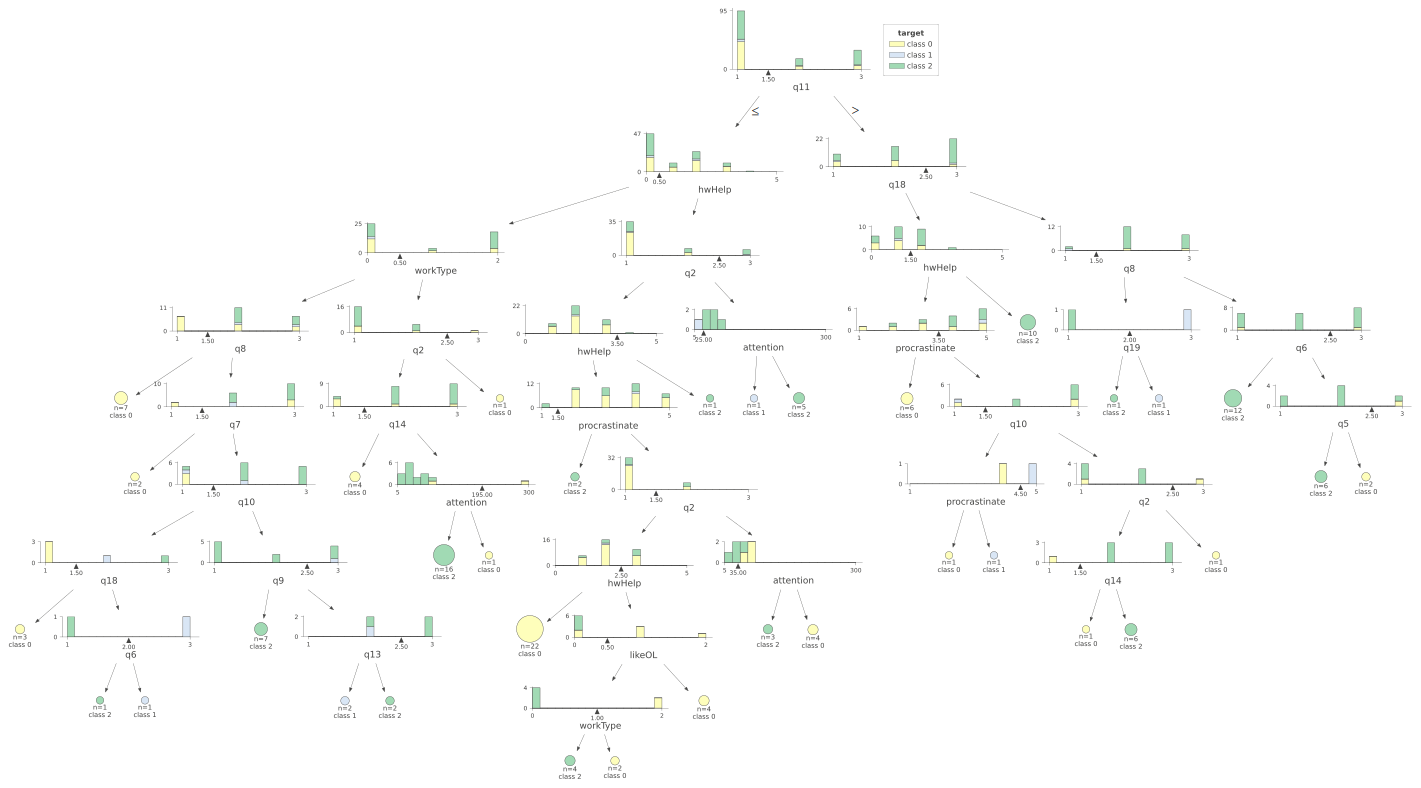

In [47]:
#https://mljar.com/blog/visualize-decision-tree/
from dtreeviz.trees import dtreeviz # remember to load the package

viz = dtreeviz(dt, X, y, target_name="target", feature_names=feature_names)
viz

In [48]:
model2 = DecisionTreeClassifier().fit(x2_train,y_train)
text_representation = tree.export_text(dt2)
print(text_representation)

|--- feature_12 <= 1.50
|   |--- feature_19 <= 1.50
|   |   |--- feature_2 <= 1.50
|   |   |   |--- class: 1
|   |   |--- feature_2 >  1.50
|   |   |   |--- feature_24 <= 1.50
|   |   |   |   |--- class: 1
|   |   |   |--- feature_24 >  1.50
|   |   |   |   |--- feature_5 <= 2.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_5 >  2.50
|   |   |   |   |   |--- feature_17 <= 1.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- feature_17 >  1.50
|   |   |   |   |   |   |--- class: 2
|   |--- feature_19 >  1.50
|   |   |--- feature_15 <= 2.50
|   |   |   |--- feature_5 <= 4.50
|   |   |   |   |--- feature_10 <= 2.00
|   |   |   |   |   |--- feature_18 <= 2.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- feature_18 >  2.50
|   |   |   |   |   |   |--- class: 2
|   |   |   |   |--- feature_10 >  2.00
|   |   |   |   |   |--- feature_25 <= 2.50
|   |   |   |   |   |   |--- feature_0 <= 1.50
|   |   |   |   |   |   |   |--- class: 1
|   |   | 

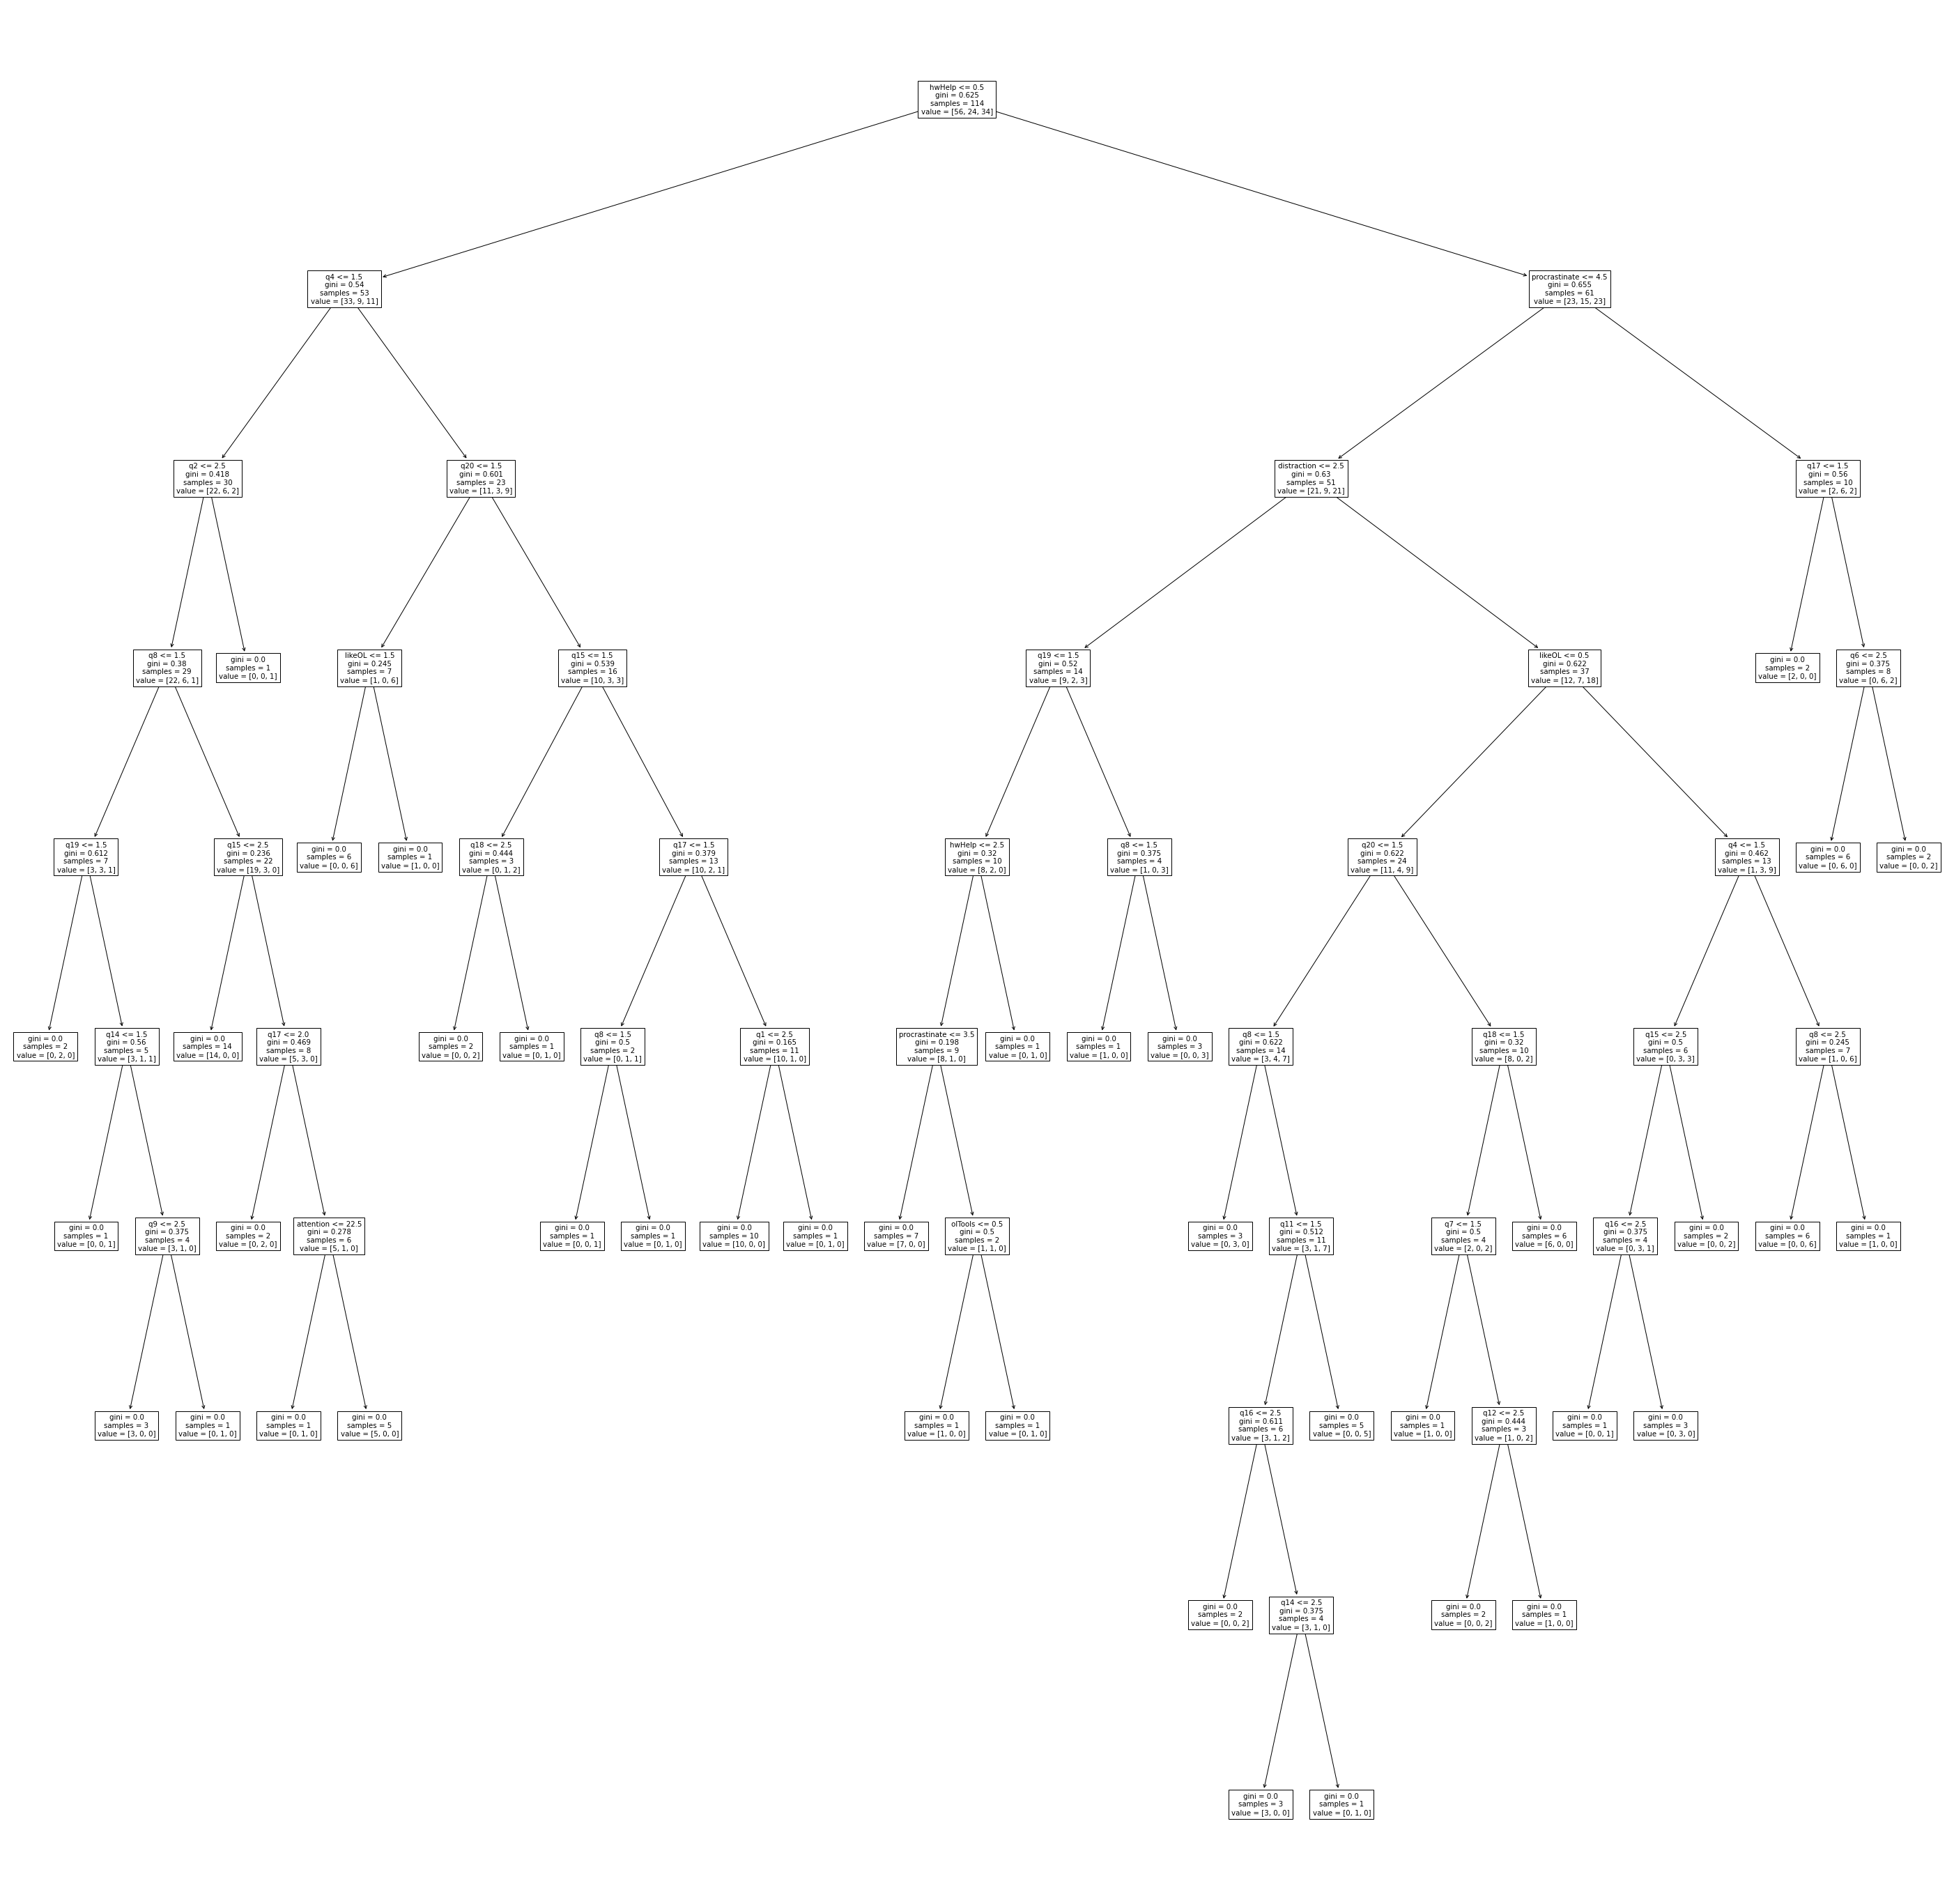

In [49]:
feature_names_class = ["styleGuess", "olTools", "hwHelp", "workType", "likeOL", "procrastinate", "distraction", "attention", "q1", "q2", "q3", \
                 "q4", "q5", "q6", "q7", "q8", "q9", "q10", "q11", "q12", "q13", "q14", "q15", "q16", "q17", "q18", "q19", "q20"] 
figClass = plt.figure(figsize=(50,50))
_ = tree.plot_tree(dtClass, feature_names=feature_names_class)

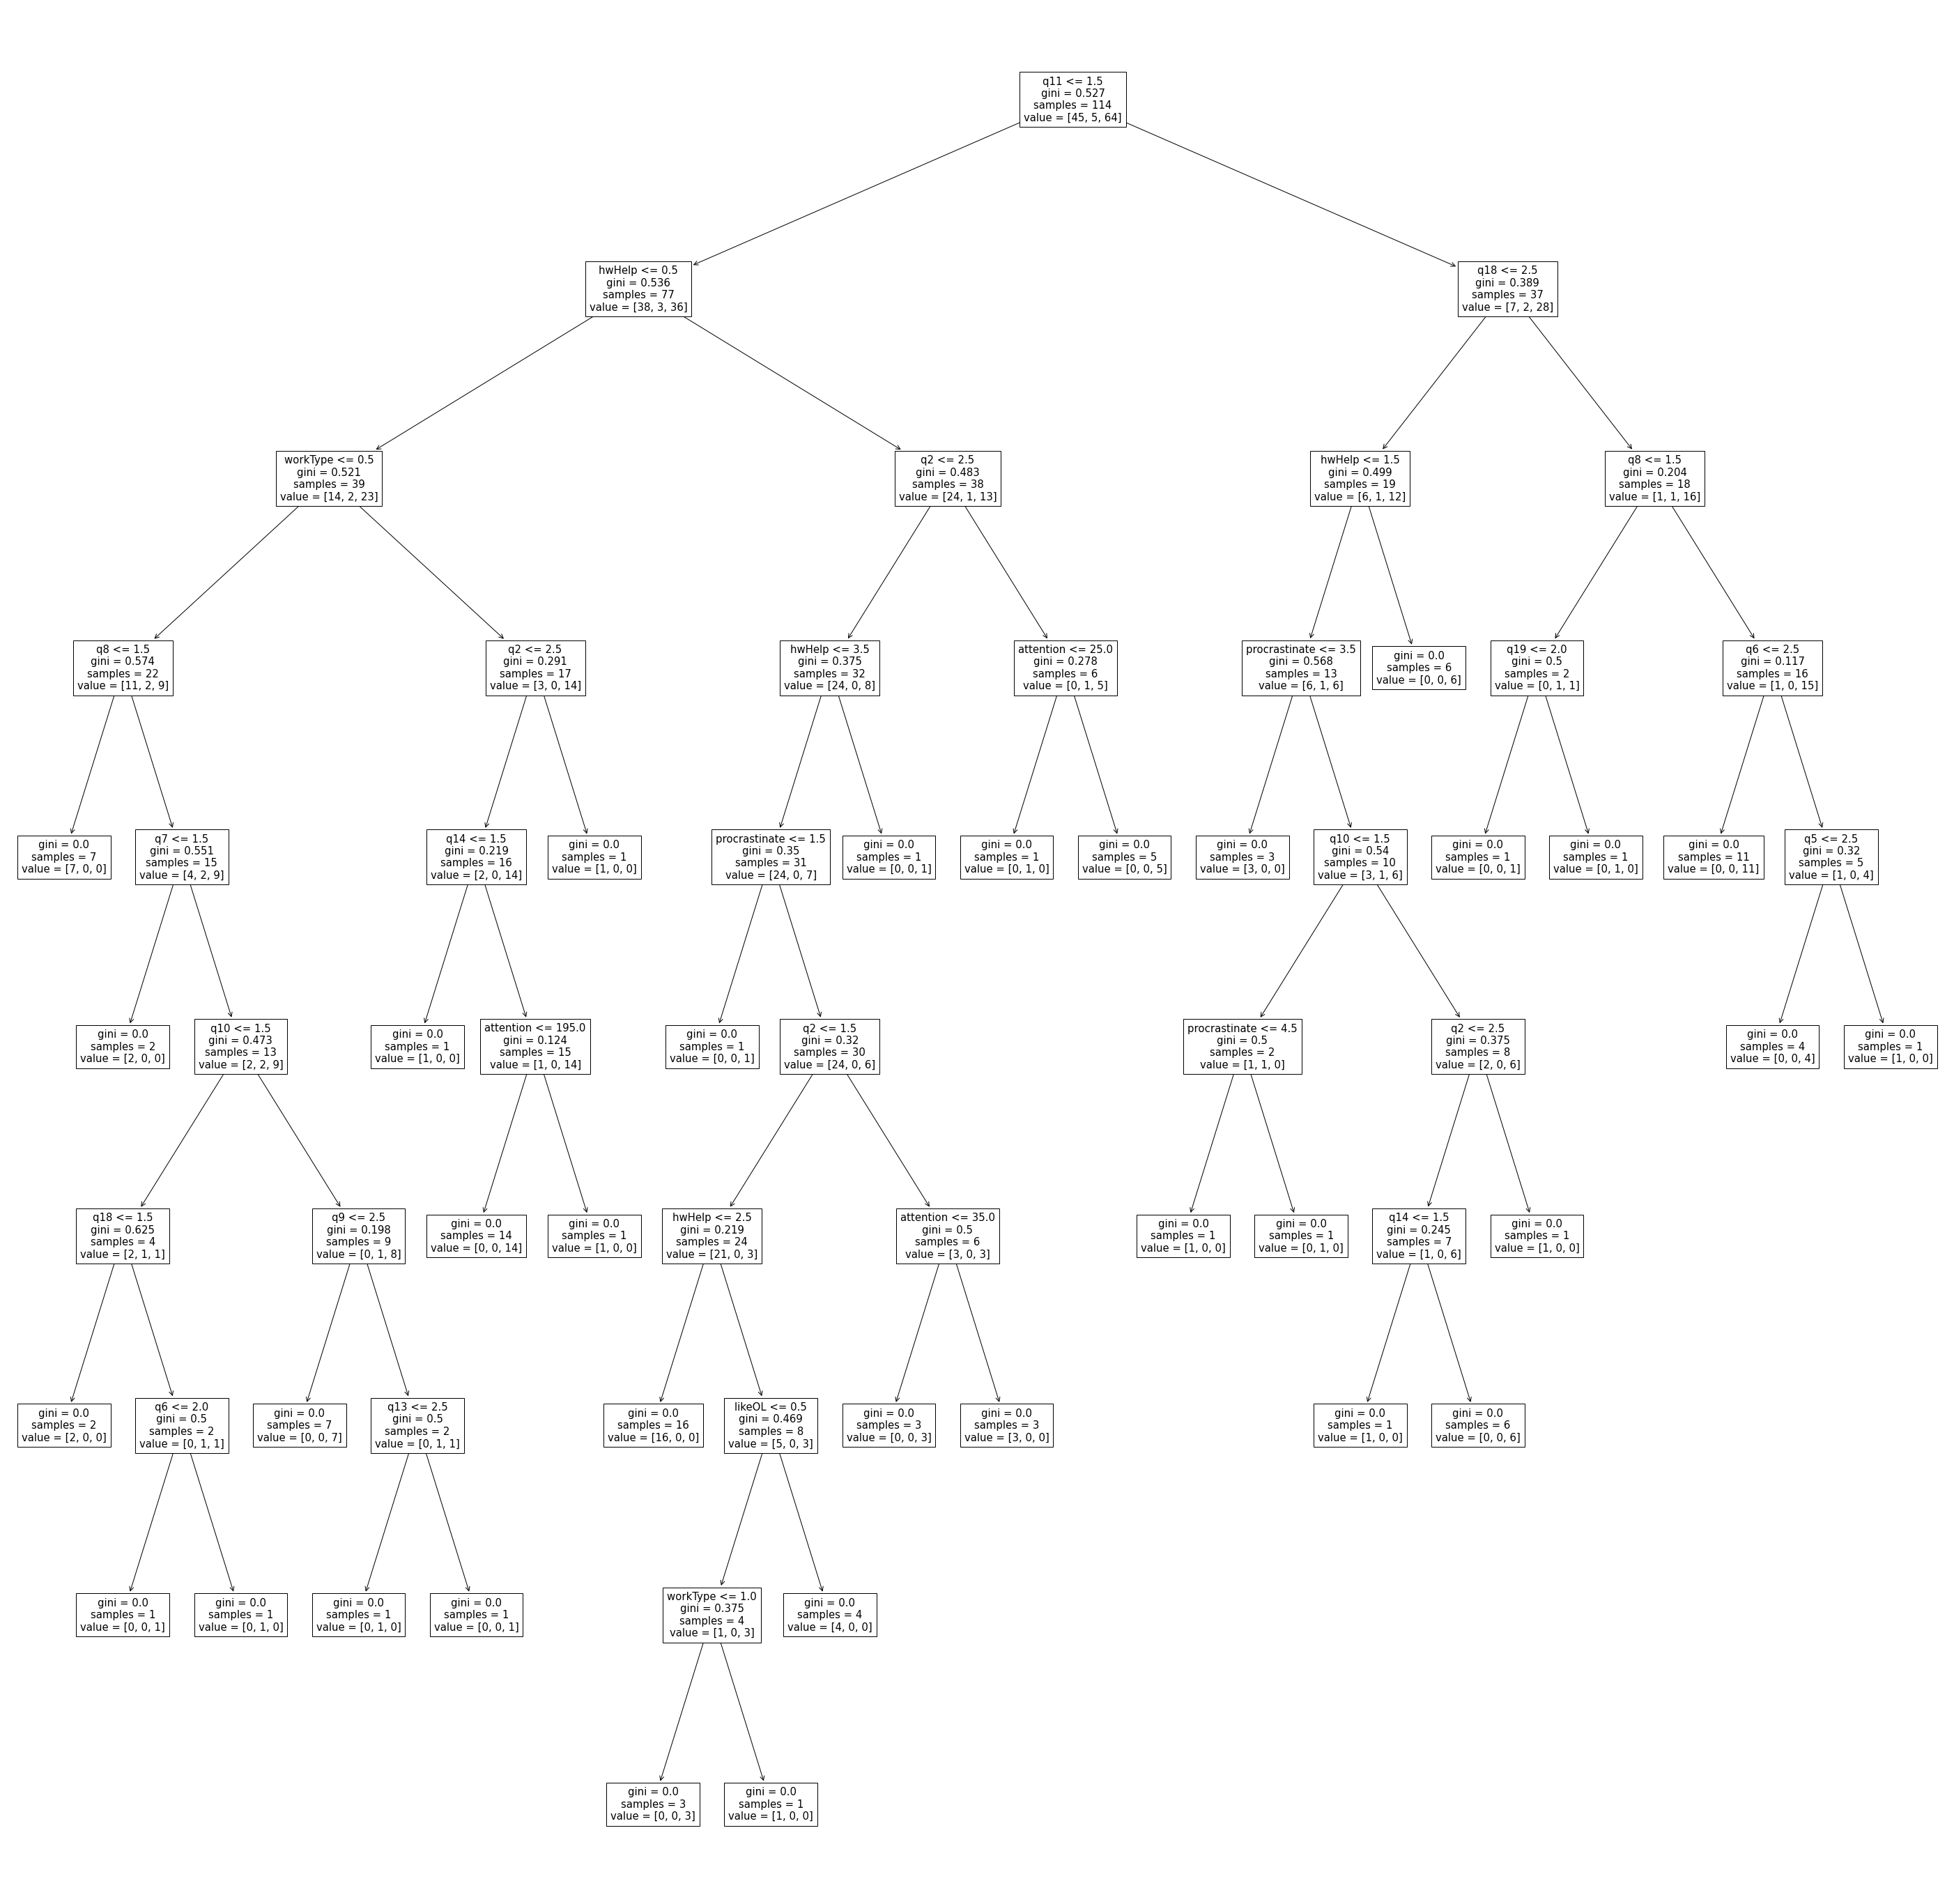

In [50]:
 fig = plt.figure(figsize=(50,50))
_ = tree.plot_tree(dt, feature_names=feature_names)

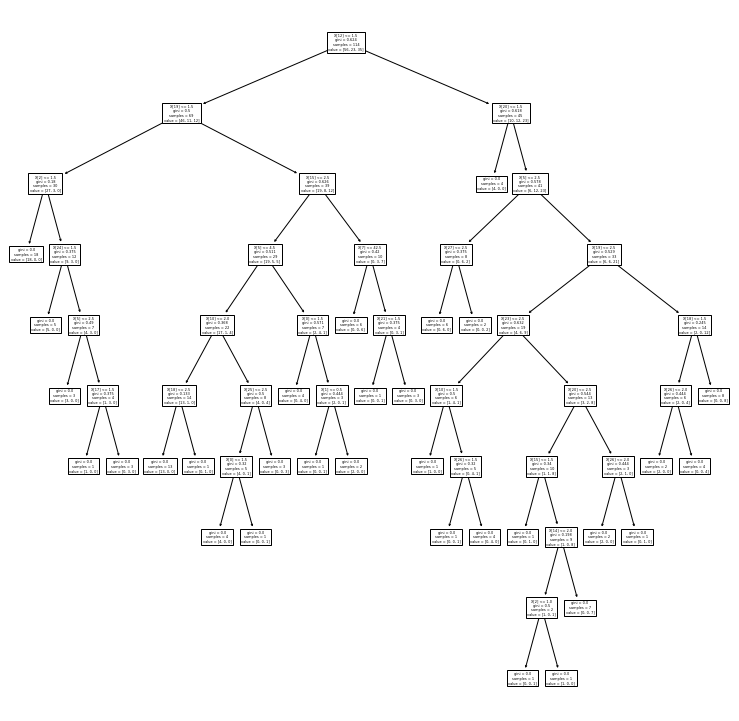

In [51]:
fig = plt.figure(figsize=(13,13))
_ = tree.plot_tree(dt2)

In [52]:
#Testing 
result = model.predict(x_test)
print(result)

result2 = model2.predict(x2_test)
print(result)

[1 1 1 3 1 3 3 1 3 3 1 3 1 3 1 1 1 2 1 1 1 1 3 3 3 3 2 3 1]
[1 1 1 3 1 3 3 1 3 3 1 3 1 3 1 1 1 2 1 1 1 1 3 3 3 3 2 3 1]


In [53]:
#Classification reports
#print(classification_report(y_test, result))
#print("Accuracy score: ", accuracy_score(y_test, result))

#print(classification_report(y2_test, result2))
#print("Accuracy score: ", accuracy_score(y2_test, result2))

**OUTPUT**

In [54]:
verClass = modelClass.predict(X)
print(verClass)

[0 2 0 2 2 2 0 1 2 1 1 0 2 2 2 0 1 2 0 2 0 0 2 0 0 2 1 0 0 0 1 0 1 0 2 0 0
 0 1 2 1 1 1 1 1 0 0 0 2 2 2 0 1 0 0 0 2 0 1 0 1 1 2 1 2 0 0 0 2 0 1 1 0 0
 2 1 2 2 2 2 2 0 2 2 1 1 0 2 2 1 0 0 0 0 0 2 1 0 2 2 2 2 0 0 0 0 0 2 0 1 0
 0 0 0 0 0 2 1 0 0 0 1 0 0 2 0 0 1 0 0 1 0 0 1 0 2 2 1 0 0 0 0 2]


In [55]:
ver1 = model.predict(X)
print(ver1)

[3 1 3 2 3 3 3 1 1 3 3 1 3 3 1 1 1 3 1 3 3 3 1 3 3 3 3 1 2 1 1 1 3 1 2 2 3
 3 1 3 3 1 1 3 1 1 1 3 3 2 1 1 1 1 3 3 3 1 3 1 3 3 3 3 3 1 1 1 1 3 2 1 1 3
 3 3 1 1 1 3 3 1 3 1 3 1 3 1 1 1 1 3 1 3 3 1 3 1 3 1 3 3 3 3 3 3 3 3 3 3 1
 3 1 3 1 3 1 3 3 3 3 1 1 3 3 3 3 1 2 1 1 1 3 1 1 3 3 1 3 3 3 1 3]


In [56]:
ver2 = model2.predict(X)
print(ver2)

[3 1 3 2 3 3 3 1 1 3 3 1 3 3 3 1 1 3 1 3 3 3 1 3 3 3 3 1 1 1 1 1 3 1 2 2 3
 3 1 3 3 1 1 3 1 1 1 3 3 3 1 1 1 1 3 3 3 1 3 1 3 3 3 3 3 1 1 1 1 3 2 1 1 3
 3 3 1 1 1 3 3 1 3 1 3 1 3 1 1 1 1 3 1 3 3 1 3 1 3 1 3 3 3 3 3 3 3 3 3 3 1
 3 1 3 1 3 1 3 3 3 3 1 1 3 3 3 3 1 2 1 1 1 3 1 1 3 3 1 3 3 3 1 3]


In [91]:
#Classification reports
print(classification_report(yClass, verClass))
print("Accuracy score: ", accuracy_score(yClass, verClass))

print(classification_report(y, ver1))
print("Accuracy score: ", accuracy_score(y, ver1))

print(classification_report(y2, ver2))
print("Accuracy score: ", accuracy_score(y2, ver2))

              precision    recall  f1-score   support

           0       0.88      0.90      0.89        68
           1       0.81      0.84      0.83        31
           2       0.88      0.84      0.86        44

    accuracy                           0.87       143
   macro avg       0.86      0.86      0.86       143
weighted avg       0.87      0.87      0.87       143

Accuracy score:  0.8671328671328671
              precision    recall  f1-score   support

           1       0.85      0.91      0.88        56
           2       0.71      0.83      0.77         6
           3       0.95      0.89      0.92        81

    accuracy                           0.90       143
   macro avg       0.84      0.88      0.86       143
weighted avg       0.90      0.90      0.90       143

Accuracy score:  0.8951048951048951
              precision    recall  f1-score   support

           1       0.57      0.48      0.52        71
           2       0.60      0.12      0.19        26
   

In [58]:
#Create dataframe
output = []
output = pd.DataFrame(output)

#insert information
output.insert(0, column = "Department", value = dept)
output.insert(1, column = "Major", value = major)
output.insert(2, column = "OGLearnStyle", value = y)
output.insert(3, column = "PQALearnStyle", value = y2)
output.insert(4, column = "PredLearnStyle(OG)", value = ver1)
output.insert(5, column = "PredLearnStyle(PQA)", value = ver2)

In [59]:
output

,Department,Major,OGLearnStyle,PQALearnStyle,PredLearnStyle(OG),PredLearnStyle(PQA)
1,College of Arts + Sciences: Math + Computer Sc...,Computer Science,3,3,3,3
2,College of Architecture,Architecture,1,1,1,1
3,College of Engineering: Civil + Architectural ...,Civil Engineering,1,1,3,3
4,College of Arts + Sciences: Natural Sciences,Nursing,2,1,2,2
5,College of Arts + Sciences: Natural Sciences,Molecular and Cell Biology,3,1,3,3
...,...,...,...,...,...,...
139,College of Engineering: Civil + Architectural ...,Architectural Engineering,3,3,3,3
140,"College of Engineering: Mechanical, Robotics, ...",Automotive Engineering,3,1,3,3
141,"College of Engineering: Mechanical, Robotics, ...",Mechanical Engineering,3,1,3,3
142,College of Architecture,Architecture,1,1,1,1


In [60]:
gv = 0
ga = 0
gt = 0

PQAv = 0
PQAa = 0
PQAt = 0

for x in range(1, numRows):
  #Getting each person's data
  persons = output.loc[x]
  #print(persons)
  
  if persons["OGLearnStyle"] == 1:
    gv = gv + 1
  elif persons["OGLearnStyle"] == 2:
    ga = ga + 1
  elif persons["OGLearnStyle"] == 3:
    gt = gt + 1

  if persons["PQALearnStyle"] == 1:
    PQAv = PQAv + 1
  elif persons["PQALearnStyle"] == 2:
    PQAa = PQAa + 1
  elif persons["PQALearnStyle"] == 3:
    PQAt = PQAt + 1

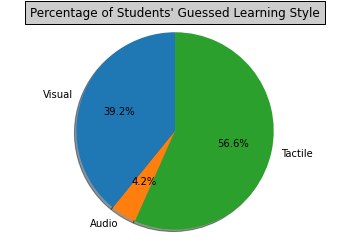

In [61]:
#Guessed
labels = 'Visual', 'Audio', 'Tactile'
sizes = [gv, ga, gt]
explode = (0, 0, 0)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal') 

plt.title("Percentage of Students' Guessed Learning Style", bbox={'facecolor':'0.8', 'pad':5})

plt.show()

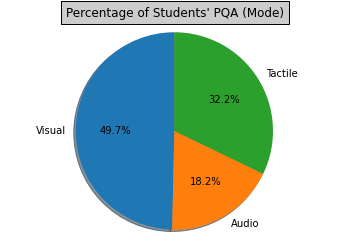

In [62]:
#Average
labels = 'Visual', 'Audio', 'Tactile'
sizes = [PQAv, PQAa, PQAt]
explode = (0, 0, 0)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal') 

plt.title("Percentage of Students' PQA (Mode)", bbox={'facecolor':'0.8', 'pad':5})

plt.show()

MODEL 1

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


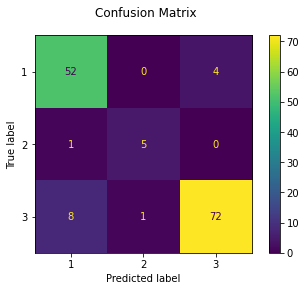

In [63]:
fig = plot_confusion_matrix(dt, X, y, display_labels=dt.classes_)
fig.figure_.suptitle("Confusion Matrix")
plt.show()

In [64]:
#Separating departments
Arch = []
vis1 = 0 #1
aud1 = 0 #2
tac1 = 0 #3

Design = []
vis2 = 0 #1
aud2 = 0 #2
tac2 = 0 #3

HumSSCom = []
vis3 = 0 #1
aud3 = 0 #2
tac3 = 0 #3

MCS = []
vis4 = 0 #1
aud4 = 0 #2
tac4 = 0 #3

NatSci = []
vis5 = 0 #1
aud5 = 0 #2
tac5 = 0 #3

bIT = []
vis6 = 0 #1
aud6 = 0 #2
tac6 = 0 #3

BME = []
vis7 = 0 #1
aud7 = 0 #2
tac7 = 0 #3

CivArchEng = []
vis8 = 0 #1
aud8 = 0 #2
tac8 = 0 #3

ElectCompEng = []
vis9 = 0 #1
aud9 = 0 #2
tac9 = 0 #3

ET = []
vis10 = 0 #1
aud10 = 0 #2
tac10 = 0 #3

MechRobIEng = []
vis11 = 0 #1
aud11 = 0 #2
tac11 = 0 #3

In [65]:
for x in range(1, numRows):
  #Getting each person's data
  persons = output.loc[x]
  #print(persons)

  if persons["Department"] == "College of Architecture":
    Arch.append(persons)
    if persons["PredLearnStyle(OG)"] == 1:
      vis1 = vis1 + 1
    elif persons["PredLearnStyle(OG)"] == 2:
      aud1 = aud1 + 1
    elif persons["PredLearnStyle(OG)"] == 3:
      tac1 = tac1 + 1
  
  if persons["Department"] == "Department of Design":
    Design.append(persons)
    if persons["PredLearnStyle(OG)"] == 1:
      vis2 = vis2 + 1
    elif persons["PredLearnStyle(OG)"] == 2:
      aud2 = aud2 + 1
    elif persons["PredLearnStyle(OG)"] == 3:
      tac2 = tac2 + 1

  if persons["Department"] == "College of Arts + Sciences: Humanities, Social Sciences, and Communication":
    HumSSCom.append(persons)
    if persons["PredLearnStyle(OG)"] == 1:
      vis3 = vis3 + 1
    elif persons["PredLearnStyle(OG)"] == 2:
      aud3 = aud3 + 1
    elif persons["PredLearnStyle(OG)"] == 3:
      tac3 = tac3 + 1
  
  if persons["Department"] == "College of Arts + Sciences: Math + Computer Science":
    MCS.append(persons)
    if persons["PredLearnStyle(OG)"] == 1:
      vis4 = vis4 + 1
    elif persons["PredLearnStyle(OG)"] == 2:
      aud4 = aud4 + 1
    elif persons["PredLearnStyle(OG)"] == 3:
      tac4 = tac4 + 1

  if persons["Department"] == "College of Arts + Sciences: Natural Sciences":
    NatSci.append(persons)
    if persons["PredLearnStyle(OG)"] == 1:
      vis5 = vis5 + 1
    elif persons["PredLearnStyle(OG)"] == 2:
      aud5 = aud5 + 1
    elif persons["PredLearnStyle(OG)"] == 3:
      tac5 = tac5 + 1
  
  if persons["Department"] == "College of Business + Information Technology":
    bIT.append(persons)
    if persons["PredLearnStyle(OG)"] == 1:
      vis6 = vis6 + 1
    elif persons["PredLearnStyle(OG)"] == 2:
      aud6 = aud6 + 1
    elif persons["PredLearnStyle(OG)"] == 3:
      tac6 = tac6 + 1

  if persons["Department"] == "College of Engineering: Biomedical Engineering":
    BME.append(persons)
    if persons["PredLearnStyle(OG)"] == 1:
      vis7 = vis7 + 1
    elif persons["PredLearnStyle(OG)"] == 2:
      aud7 = aud7 + 1
    elif persons["PredLearnStyle(OG)"] == 3:
      tac7 = tac7 + 1
  
  if persons["Department"] == "College of Engineering: Civil + Architectural Engineering":
    CivArchEng.append(persons)
    if persons["PredLearnStyle(OG)"] == 1:
      vis8 = vis8 + 1
    elif persons["PredLearnStyle(OG)"] == 2:
      aud8 = aud8 + 1
    elif persons["PredLearnStyle(OG)"] == 3:
      tac8 = tac8 + 1

  if persons["Department"] == "College of Engineering: Electrical + Computer Engineering":
    ElectCompEng.append(persons)
    if persons["PredLearnStyle(OG)"] == 1:
      vis9 = vis9 + 1
    elif persons["PredLearnStyle(OG)"] == 2:
      aud9 = aud9 + 1
    elif persons["PredLearnStyle(OG)"] == 3:
      tac9 = tac9 + 1

  if persons["Department"] == "College of Engineering: Engineering Technology":
    ET.append(persons)
    if persons["PredLearnStyle(OG)"] == 1:
      vis10 = vis10 + 1
    elif persons["PredLearnStyle(OG)"] == 2:
      aud10 = aud10 + 1
    elif persons["PredLearnStyle(OG)"] == 3:
      tac10 = tac10 + 1
  
  if persons["Department"] == "College of Engineering: Mechanical, Robotics, and Industrial Engineering":
    MechRobIEng.append(persons)
    if persons["PredLearnStyle(OG)"] == 1:
      vis11 = vis11 + 1
    elif persons["PredLearnStyle(OG)"] == 2:
      aud11 = aud11 + 1
    elif persons["PredLearnStyle(OG)"] == 3:
      tac11 = tac11 + 1

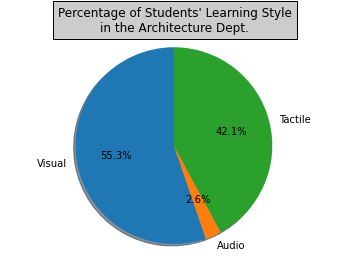

In [66]:
#Architecture
labels = 'Visual', 'Audio', 'Tactile'
sizes = [vis1, aud1, tac1]
explode = (0, 0, 0)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal') 

plt.title("Percentage of Students' Learning Style\n" + "in the Architecture Dept.", bbox={'facecolor':'0.8', 'pad':5})

plt.show()

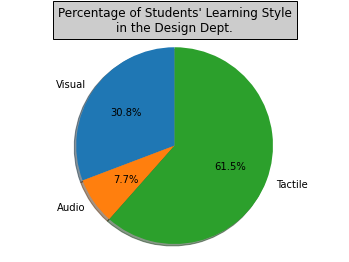

In [67]:
#Department of Design
labels = 'Visual', 'Audio', 'Tactile'
sizes = [vis2, aud2, tac2]
explode = (0, 0, 0)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal') 

plt.title("Percentage of Students' Learning Style\n" + "in the Design Dept.", bbox={'facecolor':'0.8', 'pad':5})

plt.show()

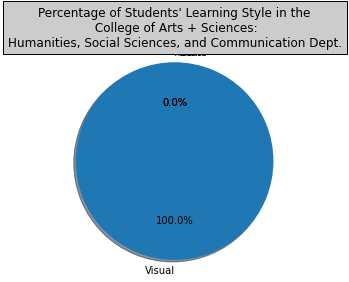

In [68]:
#College of Arts + Sciences: Humanities, Social Sciences, and Communication
labels = 'Visual', 'Audio', 'Tactile'
sizes = [vis3, aud3, tac3]
explode = (0, 0, 0)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal') 

plt.title("Percentage of Students' Learning Style in the\n College of Arts + Sciences:\n" + "Humanities, Social Sciences, and Communication Dept.", bbox={'facecolor':'0.8', 'pad':5})

plt.show()

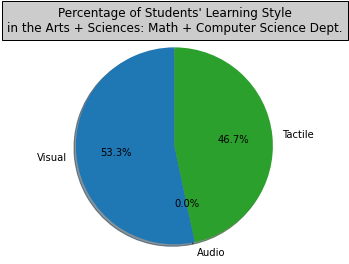

In [69]:
#College of Arts + Sciences: Math + Computer Science
labels = 'Visual', 'Audio', 'Tactile'
sizes = [vis4, aud4, tac4]
explode = (0, 0, 0)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal') 

plt.title("Percentage of Students' Learning Style\n" + "in the Arts + Sciences: Math + Computer Science Dept.", bbox={'facecolor':'0.8', 'pad':5})

plt.show()

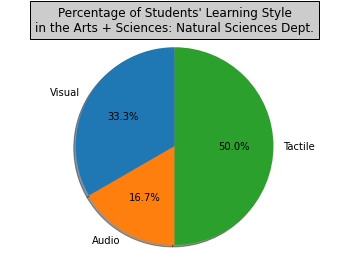

In [70]:
#College of Arts + Sciences: Natural Sciences
labels = 'Visual', 'Audio', 'Tactile'
sizes = [vis5, aud5, tac5]
explode = (0, 0, 0)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal') 

plt.title("Percentage of Students' Learning Style\n" + "in the Arts + Sciences: Natural Sciences Dept.", bbox={'facecolor':'0.8', 'pad':5})

plt.show()

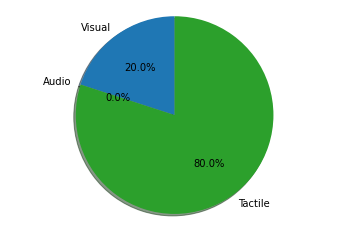

In [71]:
#College of Business + Information Technology
labels = 'Visual', 'Audio', 'Tactile'
sizes = [vis6, aud6, tac6]
explode = (0, 0, 0)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal') 

plt.show()

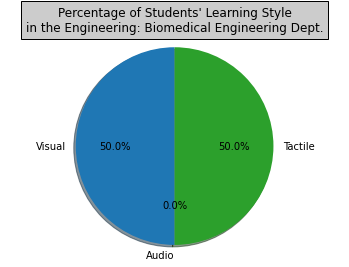

In [72]:
#College of Engineering: Biomedical Engineering
labels = 'Visual', 'Audio', 'Tactile'
sizes = [vis7, aud7, tac7]
explode = (0, 0, 0)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal') 

plt.title("Percentage of Students' Learning Style\n" + "in the Engineering: Biomedical Engineering Dept.", bbox={'facecolor':'0.8', 'pad':5})

plt.show()

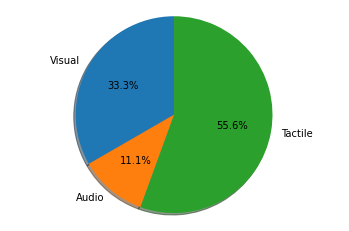

In [73]:
#College of Engineering: Civil + Architectural Engineering
labels = 'Visual', 'Audio', 'Tactile'
sizes = [vis8, aud8, tac8]
explode = (0, 0, 0)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal') 

plt.show()

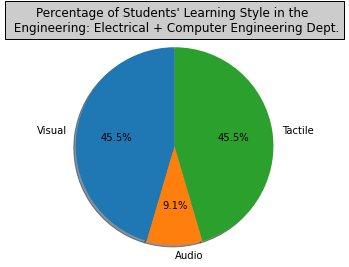

In [74]:
#College of Engineering: Electrical + Computer Engineering
labels = 'Visual', 'Audio', 'Tactile'
sizes = [vis9, aud9, tac9]
explode = (0, 0, 0)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal') 

plt.title("Percentage of Students' Learning Style in the \n Engineering: Electrical + Computer Engineering Dept.", bbox={'facecolor':'0.8', 'pad':5})

plt.show()

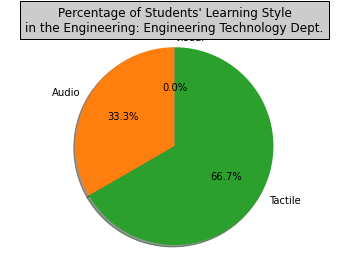

In [75]:
#College of Engineering: Engineering Technology
labels = 'Visual', 'Audio', 'Tactile'
sizes = [vis10, aud10, tac10]
explode = (0, 0, 0)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal') 

plt.title("Percentage of Students' Learning Style\n" + "in the Engineering: Engineering Technology Dept.", bbox={'facecolor':'0.8', 'pad':5})

plt.show()

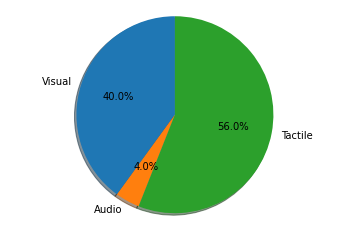

In [76]:
#College of Engineering: Mechanical, Robotics, and Industrial Engineering
labels = 'Visual', 'Audio', 'Tactile'
sizes = [vis11, aud11, tac11]
explode = (0, 0, 0)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal') 

plt.show()

In [77]:
#PIE CHARTS FOR STEM
#Separating departments
STEM = []
STEMv = 0 #1
STEMa = 0 #2
STEMt = 0 #3
STEMog = []
STEMogv = 0
STEMoga = 0
STEMogt = 0
STEMpqa = []
STEMpqav = 0
STEMpqaa = 0
STEMpqat = 0

for x in range(1, numRows):
  #Getting each person's data
  persons = output.loc[x]
  #print(persons)

  if persons["Department"] == "College of Engineering: Mechanical, Robotics, and Industrial Engineering" or \
     persons["Department"] == "College of Engineering: Engineering Technology" or \
     persons["Department"] == "College of Engineering: Electrical + Computer Engineering" or \
     persons["Department"] == "College of Engineering: Civil + Architectural Engineering" or \
     persons["Department"] == "College of Engineering: Biomedical Engineering" or \
     persons["Department"] == "College of Arts + Sciences: Math + Computer Science" or \
     persons["Department"] == "College of Arts + Sciences: Natural Sciences" or \
     persons["Department"] == "College of Business + Information Technology":
    STEM.append(persons)
    STEMog.append(persons["OGLearnStyle"])
    STEMpqa.append(persons["PQALearnStyle"])

    if persons["PredLearnStyle(OG)"] == 1:
      STEMv = STEMv + 1
    elif persons["PredLearnStyle(OG)"] == 2:
      STEMa = STEMa + 1
    elif persons["PredLearnStyle(OG)"] == 3:
      STEMt = STEMt + 1

    if persons["OGLearnStyle"] == 1:
      STEMogv = STEMogv + 1
    elif persons["OGLearnStyle"] == 2:
      STEMoga = STEMoga + 1
    elif persons["OGLearnStyle"] == 3:
      STEMogt = STEMogt + 1

    if persons["PQALearnStyle"] == 1:
      STEMpqav = STEMpqav + 1
    elif persons["PQALearnStyle"] == 2:
      STEMpqaa = STEMpqaa + 1
    elif persons["PQALearnStyle"] == 3:
      STEMpqat = STEMpqat + 1

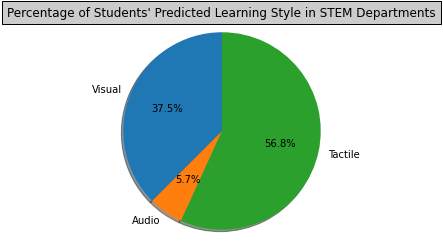

In [78]:
labels = 'Visual', 'Audio', 'Tactile'
sizes = [STEMv, STEMa, STEMt]
explode = (0, 0, 0)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal') 

plt.title("Percentage of Students' Predicted Learning Style in STEM Departments", bbox={'facecolor':'0.8', 'pad':5})

plt.show()

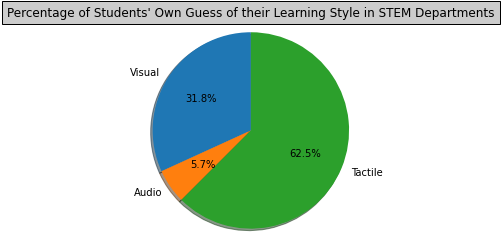

In [79]:
labels = 'Visual', 'Audio', 'Tactile'
sizes = [STEMogv, STEMoga, STEMogt]
explode = (0, 0, 0)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal') 

plt.title("Percentage of Students' Own Guess of their Learning Style in STEM Departments", bbox={'facecolor':'0.8', 'pad':5})

plt.show()

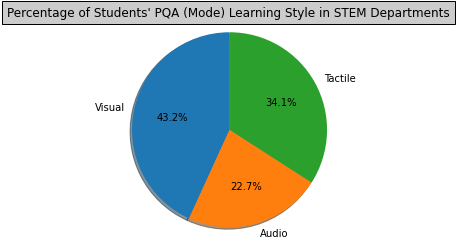

In [80]:
labels = 'Visual', 'Audio', 'Tactile'
sizes = [STEMpqav, STEMpqaa, STEMpqat]
explode = (0, 0, 0)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal') 

plt.title("Percentage of Students' PQA (Mode) Learning Style in STEM Departments", bbox={'facecolor':'0.8', 'pad':5})

plt.show()

In [81]:
#PIE CHARTS FOR NON-STEM
#Separating departments
noSTEM = []
noSTEMv = 0 #1
noSTEMa = 0 #2
noSTEMt = 0 #3
noSTEMog = []
noSTEMogv = 0
noSTEMoga = 0
noSTEMogt = 0
noSTEMpqa = []
noSTEMpqav = 0
noSTEMpqaa = 0
noSTEMpqat = 0

for x in range(1, numRows):
  #Getting each person's data
  persons = output.loc[x]
  #print(persons)

  if persons["Department"] == "College of Architecture" or \
     persons["Department"] == "Department of Design" or \
     persons["Department"] == "College of Arts + Sciences: Humanities, Social Sciences, and Communication":
    noSTEM.append(persons)
    noSTEMog.append(persons["OGLearnStyle"])
    noSTEMpqa.append(persons["PQALearnStyle"])

    if persons["PredLearnStyle(OG)"] == 1:
      noSTEMv = noSTEMv + 1
    elif persons["PredLearnStyle(OG)"] == 2:
      noSTEMa = noSTEMa + 1
    elif persons["PredLearnStyle(OG)"] == 3:
      noSTEMt = noSTEMt + 1
    
    if persons["OGLearnStyle"] == 1:
      noSTEMogv = STEMogv + 1
    elif persons["OGLearnStyle"] == 2:
      noSTEMoga = STEMoga + 1
    elif persons["OGLearnStyle"] == 3:
      noSTEMogt = STEMogt + 1

    if persons["PQALearnStyle"] == 1:
      noSTEMpqav = STEMpqav + 1
    elif persons["PQALearnStyle"] == 2:
      noSTEMpqaa = STEMpqaa + 1
    elif persons["PQALearnStyle"] == 3:
      noSTEMpqat = STEMpqat + 1

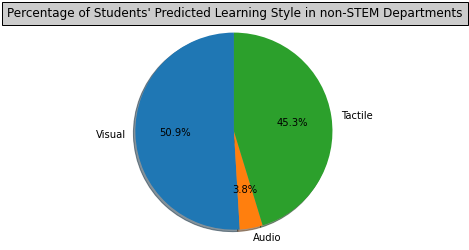

In [82]:
labels = 'Visual', 'Audio', 'Tactile'
sizes = [noSTEMv, noSTEMa, noSTEMt]
explode = (0, 0, 0)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal') 

plt.title("Percentage of Students' Predicted Learning Style in non-STEM Departments", bbox={'facecolor':'0.8', 'pad':5})

plt.show()

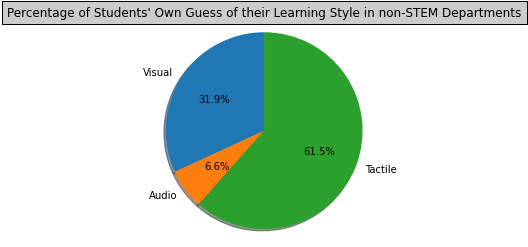

In [83]:
labels = 'Visual', 'Audio', 'Tactile'
sizes = [noSTEMogv, noSTEMoga, noSTEMogt]
explode = (0, 0, 0)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal') 

plt.title("Percentage of Students' Own Guess of their Learning Style in non-STEM Departments", bbox={'facecolor':'0.8', 'pad':5})

plt.show()

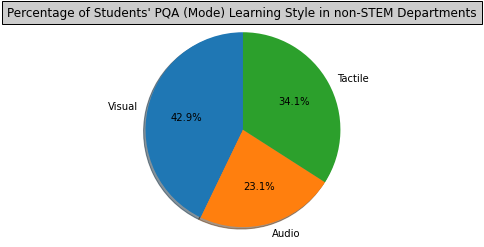

In [84]:
labels = 'Visual', 'Audio', 'Tactile'
sizes = [noSTEMpqav, noSTEMpqaa, noSTEMpqat]
explode = (0, 0, 0)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal') 

plt.title("Percentage of Students' PQA (Mode) Learning Style in non-STEM Departments", bbox={'facecolor':'0.8', 'pad':5})

plt.show()

MODEL 2

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


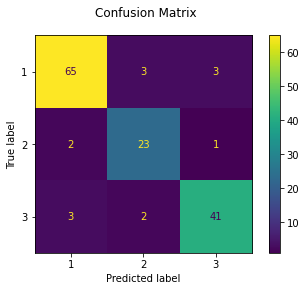

In [85]:
fig = plot_confusion_matrix(dt2, X2, y2, display_labels=dt2.classes_)
fig.figure_.suptitle("Confusion Matrix")
plt.show()

In [86]:
#Separating departments
Arch = []
vis1 = 0 #1
aud1 = 0 #2
tac1 = 0 #3

Design = []
vis2 = 0 #1
aud2 = 0 #2
tac2 = 0 #3

HumSSCom = []
vis3 = 0 #1
aud3 = 0 #2
tac3 = 0 #3

MCS = []
vis4 = 0 #1
aud4 = 0 #2
tac4 = 0 #3

NatSci = []
vis5 = 0 #1
aud5 = 0 #2
tac5 = 0 #3

bIT = []
vis6 = 0 #1
aud6 = 0 #2
tac6 = 0 #3

BME = []
vis7 = 0 #1
aud7 = 0 #2
tac7 = 0 #3

CivArchEng = []
vis8 = 0 #1
aud8 = 0 #2
tac8 = 0 #3

ElectCompEng = []
vis9 = 0 #1
aud9 = 0 #2
tac9 = 0 #3

ET = []
vis10 = 0 #1
aud10 = 0 #2
tac10 = 0 #3

MechRobIEng = []
vis11 = 0 #1
aud11 = 0 #2
tac11 = 0 #3

In [87]:
for x in range(1, numRows):
  #Getting each person's data
  persons = output.loc[x]
  #print(persons)

  if persons["Department"] == "College of Architecture":
    Arch.append(persons)
    if persons["PredLearnStyle(AVRG)"] == 1:
      vis1 = vis1 + 1
    elif persons["PredLearnStyle(AVRG)"] == 2:
      aud1 = aud1 + 1
    elif persons["PredLearnStyle(AVRG)"] == 3:
      tac1 = tac1 + 1
  
  if persons["Department"] == "Department of Design":
    Design.append(persons)
    if persons["PredLearnStyle(AVRG)"] == 1:
      vis2 = vis2 + 1
    elif persons["PredLearnStyle(AVRG)"] == 2:
      aud2 = aud2 + 1
    elif persons["PredLearnStyle(AVRG)"] == 3:
      tac2 = tac2 + 1

  if persons["Department"] == "College of Arts + Sciences: Humanities, Social Sciences, and Communication":
    HumSSCom.append(persons)
    if persons["PredLearnStyle(AVRG)"] == 1:
      vis3 = vis3 + 1
    elif persons["PredLearnStyle(AVRG)"] == 2:
      aud3 = aud3 + 1
    elif persons["PredLearnStyle(AVRG)"] == 3:
      tac3 = tac3 + 1
  
  if persons["Department"] == "College of Arts + Sciences: Math + Computer Science":
    MCS.append(persons)
    if persons["PredLearnStyle(AVRG)"] == 1:
      vis4 = vis4 + 1
    elif persons["PredLearnStyle(AVRG)"] == 2:
      aud4 = aud4 + 1
    elif persons["PredLearnStyle(AVRG)"] == 3:
      tac4 = tac4 + 1

  if persons["Department"] == "College of Arts + Sciences: Natural Sciences":
    NatSci.append(persons)
    if persons["PredLearnStyle(AVRG)"] == 1:
      vis5 = vis5 + 1
    elif persons["PredLearnStyle(AVRG)"] == 2:
      aud5 = aud5 + 1
    elif persons["PredLearnStyle(AVRG)"] == 3:
      tac5 = tac5 + 1
  
  if persons["Department"] == "College of Business + Information Technology":
    bIT.append(persons)
    if persons["PredLearnStyle(AVRG)"] == 1:
      vis6 = vis6 + 1
    elif persons["PredLearnStyle(AVRG)"] == 2:
      aud6 = aud6 + 1
    elif persons["PredLearnStyle(AVRG)"] == 3:
      tac6 = tac6 + 1

  if persons["Department"] == "College of Engineering: Biomedical Engineering":
    BME.append(persons)
    if persons["PredLearnStyle(AVRG)"] == 1:
      vis7 = vis7 + 1
    elif persons["PredLearnStyle(AVRG)"] == 2:
      aud7 = aud7 + 1
    elif persons["PredLearnStyle(AVRG)"] == 3:
      tac7 = tac7 + 1
  
  if persons["Department"] == "College of Engineering: Civil + Architectural Engineering":
    CivArchEng.append(persons)
    if persons["PredLearnStyle(AVRG)"] == 1:
      vis8 = vis8 + 1
    elif persons["PredLearnStyle(AVRG)"] == 2:
      aud8 = aud8 + 1
    elif persons["PredLearnStyle(AVRG)"] == 3:
      tac8 = tac8 + 1

  if persons["Department"] == "College of Engineering: Electrical + Computer Engineering":
    ElectCompEng.append(persons)
    if persons["PredLearnStyle(AVRG)"] == 1:
      vis9 = vis9 + 1
    elif persons["PredLearnStyle(AVRG)"] == 2:
      aud9 = aud9 + 1
    elif persons["PredLearnStyle(AVRG)"] == 3:
      tac9 = tac9 + 1

  if persons["Department"] == "College of Engineering: Engineering Technology":
    ET.append(persons)
    if persons["PredLearnStyle(AVRG)"] == 1:
      vis10 = vis10 + 1
    elif persons["PredLearnStyle(AVRG)"] == 2:
      aud10 = aud10 + 1
    elif persons["PredLearnStyle(AVRG)"] == 3:
      tac10 = tac10 + 1
  
  if persons["Department"] == "College of Engineering: Mechanical, Robotics, and Industrial Engineering":
    MechRobIEng.append(persons)
    if persons["PredLearnStyle(AVRG)"] == 1:
      vis11 = vis11 + 1
    elif persons["PredLearnStyle(AVRG)"] == 2:
      aud11 = aud11 + 1
    elif persons["PredLearnStyle(AVRG)"] == 3:
      tac11 = tac11 + 1

KeyError: ignored

In [ ]:
#Architecture
labels = 'Visual', 'Audio', 'Tactile'
sizes = [vis1, aud1, tac1]
explode = (0, 0, 0)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal') 

plt.show()

In [ ]:
#Department of Design
labels = 'Visual', 'Audio', 'Tactile'
sizes = [vis2, aud2, tac2]
explode = (0, 0, 0)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal') 

plt.show()

In [ ]:
#College of Arts + Sciences: Humanities, Social Sciences, and Communication
labels = 'Visual', 'Audio', 'Tactile'
sizes = [vis3, aud3, tac3]
explode = (0, 0, 0)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal') 

plt.show()

In [ ]:
#College of Arts + Sciences: Math + Computer Science
labels = 'Visual', 'Audio', 'Tactile'
sizes = [vis4, aud4, tac4]
explode = (0, 0, 0)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal') 

plt.show()

In [ ]:
#College of Arts + Sciences: Natural Sciences
labels = 'Visual', 'Audio', 'Tactile'
sizes = [vis5, aud5, tac5]
explode = (0, 0, 0)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal') 

plt.show()

In [ ]:
#College of Business + Information Technology
labels = 'Visual', 'Audio', 'Tactile'
sizes = [vis6, aud6, tac6]
explode = (0, 0, 0)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal') 

plt.show()

In [ ]:
#College of Engineering: Biomedical Engineering
labels = 'Visual', 'Audio', 'Tactile'
sizes = [vis7, aud7, tac7]
explode = (0, 0, 0)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal') 

plt.show()

In [ ]:
#College of Engineering: Civil + Architectural Engineering
labels = 'Visual', 'Audio', 'Tactile'
sizes = [vis8, aud8, tac8]
explode = (0, 0, 0)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal') 

plt.show()

In [ ]:
#College of Engineering: Electrical + Computer Engineering
labels = 'Visual', 'Audio', 'Tactile'
sizes = [vis9, aud9, tac9]
explode = (0, 0, 0)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal') 

plt.show()

In [ ]:
#College of Engineering: Engineering Technology
labels = 'Visual', 'Audio', 'Tactile'
sizes = [vis10, aud10, tac10]
explode = (0, 0, 0)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal') 

plt.show()

In [ ]:
#College of Engineering: Mechanical, Robotics, and Industrial Engineering
labels = 'Visual', 'Audio', 'Tactile'
sizes = [vis11, aud11, tac11]
explode = (0, 0, 0)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal') 

plt.show()

In [ ]:
#Export to output.csv ---> https://gist.github.com/korakot/3c9a33c12c6547ed38b2ca4b1e311426
#https://stackoverflow.com/questions/62917910/python-export-pandas-dataframe-to-google-sheets-solved
#title = 'output'
#gc.create(title)  # if not exist 
#sheet = gc.open('output').sheet1
#set_with_dataframe(sheet, output) 

#Create new sheet if we don't have one already
#sh = gc.create('Output')

In [ ]:
# Open our new sheet and add some data.
worksheet = gc.open('Output').sheet1

worksheet.update([output.columns.values.tolist()] + output.values.tolist())